In [4]:
# importing the data
import pandas as pd

df = pd.read_csv('/home/dkovac/PycharmProjects/Proteus/data/raw4.csv',
                        delimiter=',', header=0, index_col=1, quotechar='"')
df.info()



<class 'pandas.core.frame.DataFrame'>
Index: 43784 entries, 8718ff9c6116730d5775f4947f30d20cb11d41a1 to 420c252a362757de22e3775b922132eb0bd9bdf2
Data columns (total 34 columns):
Unnamed: 0                          43784 non-null int64
group                               43784 non-null int64
label                               43784 non-null int64
entropy                             43784 non-null float64
imports                             43784 non-null object
imports_count                       43784 non-null int64
apis                                43784 non-null object
apis_count                          43784 non-null int64
has_children                        43784 non-null bool
children_entropies_mean             21185 non-null float64
children_entropies_std              21185 non-null float64
section_names                       43784 non-null object
text_entropy                        18364 non-null float64
data_entropy                        15013 non-null float64
rdata_entrop

In [78]:
# train test split
from sklearn.model_selection import train_test_split

df['section_names'] = df['section_names'].str.lower()
df['apis'] = df['apis'].str.lower()
df['imports'] = df['imports'].str.lower()
features = df.drop(['Unnamed: 0', 'group', 'label'], axis=1)
#'section_names', 'label' 'group',
labels = df[['label']]
# Monte Carlo CV
features_train, features_test, labels_train, labels_test = \
    train_test_split(features, labels, test_size=0.2, random_state=42, stratify=labels)

#null_data = df[df.isnull().any(axis=1)]
#print(null_data.group.value_counts(normalize=True))
#df.group.value_counts(normalize=True)
#df = df.fillna(0)


In [79]:
from sklearn.base import BaseEstimator, TransformerMixin


class ItemSelector(BaseEstimator, TransformerMixin):
    def __init__(self, key, dt):
        self.key = key
        self.dt = dt

    def fit(self, x, y=None):
        # does nothing
        return self

    def transform(self, data_dict):
        # this returns the column requested
        if self.dt == 'text':
            return data_dict.loc[:, self.key]
        elif self.dt == 'num2text':
            return data_dict.loc[:, self.key].astype(unicode)
        elif self.dt == 'date':
            return (data_dict.loc[:, self.key].squeeze() - pd.Timestamp(1900, 1, 1)).dt.days.to_frame()
        else:
            return data_dict.loc[:, [self.key]].astype(float)



In [80]:
from sklearn.pipeline import FeatureUnion
from sklearn.preprocessing import OneHotEncoder
from sklearn.feature_extraction.text import TfidfTransformer

def preproc_pipeline():
    return FeatureUnion(
        transformer_list=[
            ('entropy', Pipeline([
                ('selector', ItemSelector(key='entropy', dt='num')),
                ('impute', Imputer(strategy='mean', axis=0))
            ])),
            ('imports_count', Pipeline([
                ('selector', ItemSelector(key='imports_count', dt='num')),
                ('impute', Imputer(strategy='mean', axis=0))
            ])),
            ('apis_c', Pipeline([
                ('selector', ItemSelector(key='apis_count', dt='num')),
                ('impute', Imputer(strategy='mean', axis=0))
            ])),
            ('children_entropies_mean', Pipeline([
                ('selector', ItemSelector(key='children_entropies_mean', dt='num')),
                ('impute', Imputer(strategy='mean', axis=0))
            ])),
            ('children_entropies_std', Pipeline([
                ('selector', ItemSelector(key='children_entropies_std', dt='num')),
                ('impute', Imputer(strategy='mean', axis=0))
            ])),
            ################
            ('text_entropy', Pipeline([
                ('selector', ItemSelector(key='text_entropy', dt='num')),
                ('impute', Imputer(strategy='mean', axis=0))
            ])),
            ('data_entropy', Pipeline([
                ('selector', ItemSelector(key='data_entropy', dt='num')),
                ('impute', Imputer(strategy='mean', axis=0))
            ])),
            ('rdata_entropy', Pipeline([
                ('selector', ItemSelector(key='rdata_entropy', dt='num')),
                ('impute', Imputer(strategy='mean', axis=0))
            ])),
            ('buildid_entropy', Pipeline([
                ('selector', ItemSelector(key='buildid_entropy', dt='num')),
                ('impute', Imputer(strategy='mean', axis=0))
            ])),
            ('pdata_entropy', Pipeline([
                ('selector', ItemSelector(key='pdata_entropy', dt='num')),
                ('impute', Imputer(strategy='mean', axis=0))
            ])),
            #('xdata_entropy', Pipeline([
            #    ('selector', ItemSelector(key='xdata_entropy', dt='num')),
            #    ('impute', Imputer(strategy='mean', axis=0))
            #])),
            #('bss_entropy', Pipeline([
            #    ('selector', ItemSelector(key='bss_entropy', dt='num')),
            #    ('impute', Imputer(strategy='mean', axis=0))
            #])),
            #('edata_entropy', Pipeline([
            #    ('selector', ItemSelector(key='edata_entropy', dt='num')),
            #    ('impute', Imputer(strategy='mean', axis=0))
            #])),
            ('idata_entropy', Pipeline([
                ('selector', ItemSelector(key='idata_entropy', dt='num')),
                ('impute', Imputer(strategy='mean', axis=0))
            ])),
            ('reloc_entropy', Pipeline([
                ('selector', ItemSelector(key='reloc_entropy', dt='num')),
                ('impute', Imputer(strategy='mean', axis=0))
            ])),
            ('no_name_entropy_mean', Pipeline([
                ('selector', ItemSelector(key='no_name_entropy_mean', dt='num')),
                ('impute', Imputer(strategy='mean', axis=0))
            ])),
            ('no_name_entropy_std', Pipeline([
                ('selector', ItemSelector(key='no_name_entropy_std', dt='num')),
                ('impute', Imputer(strategy='mean', axis=0))
            ])),
            ('other_entropy_mean', Pipeline([
                ('selector', ItemSelector(key='other_entropy_mean', dt='num')),
                ('impute', Imputer(strategy='mean', axis=0))
            ])),
            ('other_entropy_std', Pipeline([
                ('selector', ItemSelector(key='other_entropy_std', dt='num')),
                ('impute', Imputer(strategy='mean', axis=0))
            ])),
            ('entry_point', Pipeline([
                ('selector', ItemSelector(key='entry_points_addresses', dt='num')),
                ('impute', Imputer(strategy='mean', axis=0))
            ])),
            ('image_base', Pipeline([
                ('selector', ItemSelector(key='image_bases', dt='num')),
                ('impute', Imputer(strategy='mean', axis=0))
            ])),
            ('image_size', Pipeline([
                ('selector', ItemSelector(key='image_sizes', dt='num')),
                ('impute', Imputer(strategy='mean', axis=0))
            ])),
            ('children_sections_entropies_mean', Pipeline([
                ('selector', ItemSelector(key='children_sections_entropies_mean', dt='num')),
                ('impute', Imputer(strategy='mean', axis=0))
            ])),
            ('children_sections_entropies_std', Pipeline([
                ('selector', ItemSelector(key='children_sections_entropies_std', dt='num')),
                ('impute', Imputer(strategy='mean', axis=0))
            ])),
            ################
            ('children', Pipeline([
                ('selector', ItemSelector(key='checksum_valid', dt='categ')),
                ('impute', OneHotEncoder())
            ])),
            ('checsum', Pipeline([
                ('selector', ItemSelector(key='has_children', dt='categ')),
              ('impute', OneHotEncoder())
            ])),
            ##############
            #('sections', Pipeline([
            #    ('selector', ItemSelector(key='section_names', dt='text')),
            #    ('cv', CountVectorizer(binary=False, ngram_range=(1, 1))),  # max_features=100
            #    #('tfidf_transformer', TfidfTransformer())
            #])),
            #('imports', Pipeline([
            #    ('selector', ItemSelector(key='imports', dt='text')),
            #    ('cv', CountVectorizer(binary=False, ngram_range=(1, 1))),  # max_features=100
            #    #('tfidf_transformer', TfidfTransformer())
            #])),
            #('apis', Pipeline([
            #    ('selector', ItemSelector(key='apis', dt='text')),
            #    ('cv', CountVectorizer(binary=False, ngram_range=(1, 1))),  # max_features=100
            #    #('tfidf_transformer', TfidfTransformer())
            #])),
            #('tags', Pipeline([
            #    ('selector', ItemSelector(key='tags', dt='text')),
            #    ('cv', CountVectorizer(binary=False, ngram_range=(1, 1))),  # max_features=100
            #    #('tfidf_transformer', TfidfTransformer())
            #])),
            #('children_tags', Pipeline([
            #    ('selector', ItemSelector(key='children_tags', dt='text')),
            #    ('cv', CountVectorizer(binary=False, ngram_range=(1, 1))),  # max_features=100
            #    #('tfidf_transformer', TfidfTransformer())
            #])),
        ])


In [81]:
# try ensembles, i distilled
# log reg model
from sklearn.linear_model import LogisticRegression

params = {
    'lr__C': [10],#[0.001, 0.01, 0.1, 1, 10, 100, 1000],
    'lr__penalty': ['l2']#['l1', 'l2']
}

lr = LogisticRegression(random_state=42)


In [76]:
import xgboost as xgb
vect = preproc_pipeline().fit_transform(features)
params = {'seed': 42, 'max_depth': 8, 'learning_rate': 0.01, 'num_class': 2,
          'min_child_weight': 1, 'gamma': 0, 'subsample': 0.9, 'colsample_bytree ': 0.6}
cv_xgb = xgb.cv(params, xgb.DMatrix(vect, labels), early_stopping_rounds=500, verbose_eval=1,
                num_boost_round=5000, nfold=3)


[0]	train-merror:0.0265163+0.00877731	test-merror:0.0301703+0.0096963


[1]	train-merror:0.027236+0.00735498	test-merror:0.031107+0.00800298


[2]	train-merror:0.0254203+0.00829344	test-merror:0.0293253+0.00915436


[3]	train-merror:0.0260373+0.00877731	test-merror:0.0301477+0.00927537


[4]	train-merror:0.0260257+0.00879558	test-merror:0.030056+0.00919761


[5]	train-merror:0.02598+0.00871399	test-merror:0.029965+0.00936716


[6]	train-merror:0.0259687+0.00868076	test-merror:0.029965+0.00935754


[7]	train-merror:0.0259917+0.00864826	test-merror:0.0299877+0.00942135


[8]	train-merror:0.0260487+0.00856772	test-merror:0.0300563+0.0092985


[9]	train-merror:0.0260713+0.00860962	test-merror:0.0300107+0.0094236


[10]	train-merror:0.0260713+0.00863178	test-merror:0.0300333+0.00951388


[11]	train-merror:0.0260713+0.00860718	test-merror:0.0299193+0.00939418


[12]	train-merror:0.025786+0.0084956	test-merror:0.029577+0.0092302


[13]	train-merror:0.0255573+0.00833579	test-merror:0.029074+0.00884315


[14]	train-merror:0.0249637+0.00796735	test-merror:0.028686+0.00876366


[15]	train-merror:0.0246663+0.00784078	test-merror:0.0283203+0.00854108


[16]	train-merror:0.022154+0.00652871	test-merror:0.0256713+0.0067409


[17]	train-merror:0.0212637+0.00642592	test-merror:0.0245523+0.00633483


[18]	train-merror:0.019916+0.00714821	test-merror:0.023159+0.00686681


[19]	train-merror:0.019836+0.00684883	test-merror:0.023456+0.00662288


[20]	train-merror:0.0197447+0.00710525	test-merror:0.023182+0.00707195


[21]	train-merror:0.0194363+0.00717545	test-merror:0.0227247+0.0071895


[22]	train-merror:0.0205327+0.00671883	test-merror:0.0237527+0.00683758


[23]	train-merror:0.0206923+0.00677484	test-merror:0.023981+0.00691304


[24]	train-merror:0.0205213+0.00674549	test-merror:0.0238667+0.006791


[25]	train-merror:0.020247+0.00627523	test-merror:0.0234787+0.0065341


[26]	train-merror:0.0193107+0.006341	test-merror:0.0228393+0.00669588


[27]	train-merror:0.0190023+0.00642164	test-merror:0.0225423+0.00666704


[28]	train-merror:0.0188653+0.0062743	test-merror:0.0223597+0.00644526


[29]	train-merror:0.0186253+0.00632769	test-merror:0.0220853+0.00651297


[30]	train-merror:0.0167753+0.00405499	test-merror:0.020007+0.00394593


[31]	train-merror:0.01657+0.00374221	test-merror:0.019756+0.00362674


[32]	train-merror:0.016296+0.00361999	test-merror:0.019322+0.00325734


[33]	train-merror:0.015999+0.00325815	test-merror:0.0187967+0.00264487


[34]	train-merror:0.016022+0.00324876	test-merror:0.0188427+0.00264666


[35]	train-merror:0.016273+0.00295242	test-merror:0.0188653+0.00289925


[36]	train-merror:0.016193+0.00301036	test-merror:0.018888+0.00292378


[37]	train-merror:0.0159993+0.00281376	test-merror:0.0187513+0.00284127


[38]	train-merror:0.0158277+0.002731	test-merror:0.0185913+0.00264888


[39]	train-merror:0.0153367+0.00211993	test-merror:0.0179517+0.00255316


[40]	train-merror:0.0146973+0.00166024	test-merror:0.017495+0.00176994


[41]	train-merror:0.0143773+0.00154755	test-merror:0.0170837+0.00194582


[42]	train-merror:0.0142747+0.00148284	test-merror:0.0168557+0.00198861


[43]	train-merror:0.014172+0.00163045	test-merror:0.0168553+0.00189457


[44]	train-merror:0.013989+0.00148668	test-merror:0.0166953+0.00192577


[45]	train-merror:0.0137267+0.00141262	test-merror:0.0164673+0.0020734


[46]	train-merror:0.0136807+0.00140298	test-merror:0.016399+0.0019771


[47]	train-merror:0.013578+0.00136406	test-merror:0.0163073+0.00189925


[48]	train-merror:0.0133953+0.00123943	test-merror:0.0158963+0.00195796


[49]	train-merror:0.0127557+0.00114443	test-merror:0.0155763+0.00202031


[50]	train-merror:0.01271+0.00116297	test-merror:0.0155533+0.00209214


[51]	train-merror:0.0126987+0.00118017	test-merror:0.015576+0.00206992


[52]	train-merror:0.01271+0.00115613	test-merror:0.015576+0.0019708


[53]	train-merror:0.0129953+0.00113637	test-merror:0.0156903+0.00193874


[54]	train-merror:0.0122763+0.000676417	test-merror:0.0150053+0.00157554


[55]	train-merror:0.012185+0.000618586	test-merror:0.0149823+0.00143862


[56]	train-merror:0.0121277+0.000561404	test-merror:0.014937+0.00141868


[57]	train-merror:0.0117967+0.00021372	test-merror:0.014503+0.000830379


[58]	train-merror:0.0116597+0.000129165	test-merror:0.014366+0.000959885


[59]	train-merror:0.0114427+0.000239244	test-merror:0.0141833+0.00117494


[60]	train-merror:0.0114423+0.000228928	test-merror:0.0141603+0.00117538


[61]	train-merror:0.011374+0.000302431	test-merror:0.014092+0.00125873


[62]	train-merror:0.0113853+0.000306686	test-merror:0.014115+0.00125957


[63]	train-merror:0.0113623+0.000381808	test-merror:0.014092+0.00125873


[64]	train-merror:0.0111687+0.000269579	test-merror:0.0140233+0.00112088


[65]	train-merror:0.0110543+0.000232855	test-merror:0.013795+0.000885239


[66]	train-merror:0.0111343+0.000238862	test-merror:0.0139093+0.00101184


[67]	train-merror:0.0110313+0.000283794	test-merror:0.013772+0.000846672


[68]	train-merror:0.0110087+0.000271674	test-merror:0.0137267+0.00086899


[69]	train-merror:0.0110087+0.000326193	test-merror:0.013704+0.000879269


[70]	train-merror:0.0110083+0.000311707	test-merror:0.013681+0.000854434


[71]	train-merror:0.01094+0.000264085	test-merror:0.013681+0.000854434


[72]	train-merror:0.0108943+0.000311185	test-merror:0.0136807+0.000892244


[73]	train-merror:0.0108943+0.000311185	test-merror:0.013772+0.00093118


[74]	train-merror:0.010883+0.00032381	test-merror:0.0137493+0.000962885


[75]	train-merror:0.0108143+0.00026844	test-merror:0.0137037+0.000900464


[76]	train-merror:0.0108027+0.000281508	test-merror:0.0137037+0.000900464


[77]	train-merror:0.010803+0.000253576	test-merror:0.0137263+0.00090963


[78]	train-merror:0.0107913+0.000201432	test-merror:0.0137267+0.000761556


[79]	train-merror:0.0107913+0.000201432	test-merror:0.0137267+0.000761556


[80]	train-merror:0.010803+0.000217331	test-merror:0.0137263+0.000803709


[81]	train-merror:0.0108143+0.000179409	test-merror:0.013681+0.000744903


[82]	train-merror:0.010803+0.000163593	test-merror:0.0137723+0.000752977


[83]	train-merror:0.01078+0.00014097	test-merror:0.0137493+0.00074525


[84]	train-merror:0.0108027+0.000170869	test-merror:0.013704+0.000769178


[85]	train-merror:0.0107913+0.000155813	test-merror:0.0137497+0.000783977


[86]	train-merror:0.01078+0.00014097	test-merror:0.0137267+0.000815516


[87]	train-merror:0.0107457+0.00015371	test-merror:0.0137493+0.000824995


[88]	train-merror:0.01078+0.000196226	test-merror:0.0137267+0.000856405


[89]	train-merror:0.0107687+0.000140592	test-merror:0.0137037+0.000888324


[90]	train-merror:0.0107457+0.00015371	test-merror:0.013681+0.000919823


[91]	train-merror:0.0107113+0.000170869	test-merror:0.0137723+0.00083576


[92]	train-merror:0.0107117+0.000196614	test-merror:0.013681+0.000878351


[93]	train-merror:0.0107+0.000181837	test-merror:0.013635+0.00083546


[94]	train-merror:0.0107+0.000196226	test-merror:0.013612+0.000911231


[95]	train-merror:0.0106087+0.000240956	test-merror:0.013658+0.000899034


[96]	train-merror:0.0106313+0.000237736	test-merror:0.013635+0.000878957


[97]	train-merror:0.0106313+0.000311707	test-merror:0.013658+0.000892022


[98]	train-merror:0.010643+0.000301291	test-merror:0.013681+0.000911231


[99]	train-merror:0.0105857+0.00033894	test-merror:0.0135663+0.000873916


[100]	train-merror:0.010586+0.000339874	test-merror:0.0135663+0.000924758


[101]	train-merror:0.0105747+0.000323904	test-merror:0.0135437+0.000911799


[102]	train-merror:0.010552+0.000343291	test-merror:0.013521+0.000943619


[103]	train-merror:0.010529+0.000356051	test-merror:0.013521+0.000943619


[104]	train-merror:0.0105177+0.000340075	test-merror:0.013521+0.000943619


[105]	train-merror:0.0104607+0.000381569	test-merror:0.0134523+0.00089933


[106]	train-merror:0.0104033+0.000380408	test-merror:0.013384+0.000856716


[107]	train-merror:0.0104377+0.000427896	test-merror:0.013498+0.000941277


[108]	train-merror:0.0104037+0.000407464	test-merror:0.0134067+0.000878212


[109]	train-merror:0.010392+0.00041234	test-merror:0.0133837+0.000847278


[110]	train-merror:0.010392+0.000433458	test-merror:0.0134063+0.000815516


[111]	train-merror:0.0103693+0.000423495	test-merror:0.0134063+0.000815516


[112]	train-merror:0.0103577+0.000411879	test-merror:0.0133837+0.000804012


[113]	train-merror:0.0103237+0.000385617	test-merror:0.0133837+0.000761735


[114]	train-merror:0.0103237+0.000385617	test-merror:0.0132693+0.000815516


[115]	train-merror:0.0103237+0.000385617	test-merror:0.0132923+0.000783312


[116]	train-merror:0.0103237+0.000385617	test-merror:0.0133383+0.000815516


[117]	train-merror:0.0103237+0.000385617	test-merror:0.013338+0.000824847


[118]	train-merror:0.0102437+0.000322632	test-merror:0.0133153+0.000803851


[119]	train-merror:0.010255+0.000338294	test-merror:0.0132697+0.000772003


[120]	train-merror:0.010209+0.000322314	test-merror:0.013224+0.000752856


[121]	train-merror:0.0101637+0.000327488	test-merror:0.013224+0.000752856


[122]	train-merror:0.0101637+0.000327488	test-merror:0.0132697+0.000772003


[123]	train-merror:0.010152+0.000338294	test-merror:0.013224+0.000752856


[124]	train-merror:0.010152+0.000338294	test-merror:0.013224+0.000752856


[125]	train-merror:0.0101637+0.000327488	test-merror:0.013224+0.000752856


[126]	train-merror:0.010118+0.000364794	test-merror:0.0132697+0.000772003


[127]	train-merror:0.0101633+0.000341738	test-merror:0.0132697+0.000772003


[128]	train-merror:0.010152+0.000345126	test-merror:0.0132467+0.000804012


[129]	train-merror:0.0101407+0.000349218	test-merror:0.013247+0.000776231


[130]	train-merror:0.010152+0.000364794	test-merror:0.013247+0.000776231


[131]	train-merror:0.0101293+0.000353988	test-merror:0.013201+0.000800245


[132]	train-merror:0.0101293+0.000353988	test-merror:0.013224+0.000769445


[133]	train-merror:0.0101293+0.000353988	test-merror:0.013224+0.000769445


[134]	train-merror:0.010118+0.000338294	test-merror:0.0132467+0.000793967


[135]	train-merror:0.0101293+0.000353988	test-merror:0.013224+0.000769445


[136]	train-merror:0.0101177+0.000381569	test-merror:0.013201+0.000800245


[137]	train-merror:0.010095+0.000349727	test-merror:0.013178+0.000776231


[138]	train-merror:0.0101063+0.000343756	test-merror:0.0131327+0.000745598


[139]	train-merror:0.010129+0.000375421	test-merror:0.0131327+0.000745598


[140]	train-merror:0.010095+0.000354138	test-merror:0.0131553+0.000769534


[141]	train-merror:0.010072+0.000322314	test-merror:0.0131553+0.000769534


[142]	train-merror:0.0100723+0.000329339	test-merror:0.0131097+0.00075998


[143]	train-merror:0.0100607+0.000333353	test-merror:0.0131097+0.00075998


[144]	train-merror:0.010095+0.000380548	test-merror:0.0131097+0.00075998


[145]	train-merror:0.0100837+0.00036493	test-merror:0.0131097+0.00075998


[146]	train-merror:0.0100837+0.00036493	test-merror:0.0131097+0.00075998


[147]	train-merror:0.0100837+0.00036493	test-merror:0.0131553+0.000769534


[148]	train-merror:0.010061+0.000396763	test-merror:0.0131553+0.000769534


[149]	train-merror:0.010061+0.000396763	test-merror:0.0131327+0.000690704


[150]	train-merror:0.010038+0.000403317	test-merror:0.0131557+0.000714642


[151]	train-merror:0.00999233+0.000401854	test-merror:0.0131327+0.000690704


[152]	train-merror:0.010015+0.000433458	test-merror:0.0131323+0.000653632


[153]	train-merror:0.00996933+0.000396199	test-merror:0.0131097+0.000648864


[154]	train-merror:0.00996933+0.000396199	test-merror:0.0131323+0.000653632


[155]	train-merror:0.00996933+0.000396199	test-merror:0.013064+0.000582857


[156]	train-merror:0.009935+0.000423039	test-merror:0.013064+0.000582857


[157]	train-merror:0.009912+0.000433458	test-merror:0.013041+0.000560775


[158]	train-merror:0.00992367+0.00044975	test-merror:0.013041+0.000560775


[159]	train-merror:0.00992367+0.00044975	test-merror:0.013041+0.000560775


[160]	train-merror:0.00994633+0.000481443	test-merror:0.013041+0.000560775


[161]	train-merror:0.00991233+0.000481443	test-merror:0.013041+0.000560775


[162]	train-merror:0.00988933+0.000502267	test-merror:0.013041+0.000560775


[163]	train-merror:0.00988933+0.000502267	test-merror:0.0129953+0.000520191


[164]	train-merror:0.009878+0.000486557	test-merror:0.0129953+0.000520191


[165]	train-merror:0.00986633+0.000470408	test-merror:0.0129953+0.000520191


[166]	train-merror:0.009832+0.000403317	test-merror:0.012927+0.000423675


[167]	train-merror:0.00983233+0.000423498	test-merror:0.01295+0.000391452


[168]	train-merror:0.00983233+0.000423498	test-merror:0.01295+0.000391452


[169]	train-merror:0.009798+0.000403317	test-merror:0.01295+0.000391452


[170]	train-merror:0.009798+0.000403317	test-merror:0.01295+0.000391452


[171]	train-merror:0.00978667+0.000387944	test-merror:0.01295+0.000391452


[172]	train-merror:0.00978667+0.000387944	test-merror:0.01295+0.000391452


[173]	train-merror:0.00976367+0.000356921	test-merror:0.0129503+0.000403431


[174]	train-merror:0.00976367+0.000384143	test-merror:0.012973+0.00041234


[175]	train-merror:0.00978667+0.000379344	test-merror:0.0128587+0.000396917


[176]	train-merror:0.00971833+0.00043323	test-merror:0.0129043+0.000412489


[177]	train-merror:0.00970667+0.00043323	test-merror:0.0128817+0.000422533


[178]	train-merror:0.00968367+0.000447727	test-merror:0.01279+0.000475887


[179]	train-merror:0.00968367+0.000447727	test-merror:0.01279+0.000475887


[180]	train-merror:0.00968367+0.000447727	test-merror:0.01279+0.000475887


[181]	train-merror:0.00967233+0.000489147	test-merror:0.0127213+0.000396839


[182]	train-merror:0.00963833+0.000476281	test-merror:0.0126983+0.00042744


[183]	train-merror:0.009581+0.000507466	test-merror:0.0126983+0.00042744


[184]	train-merror:0.00961533+0.000503618	test-merror:0.0127213+0.000396839


[185]	train-merror:0.009604+0.000489551	test-merror:0.0127213+0.000396839


[186]	train-merror:0.00961533+0.000503618	test-merror:0.0126987+0.000392879


[187]	train-merror:0.009604+0.000489551	test-merror:0.0126987+0.000392879


[188]	train-merror:0.009581+0.000475887	test-merror:0.0126757+0.000422533


[189]	train-merror:0.00956967+0.000489559	test-merror:0.01263+0.000372728


[190]	train-merror:0.00959267+0.000490091	test-merror:0.012676+0.000367007


[191]	train-merror:0.009558+0.000475201	test-merror:0.01263+0.000337153


[192]	train-merror:0.00956967+0.000475487	test-merror:0.01263+0.000337153


[193]	train-merror:0.00955833+0.000461971	test-merror:0.012607+0.000367007


[194]	train-merror:0.00955833+0.000461971	test-merror:0.01263+0.000372728


[195]	train-merror:0.00955833+0.000461971	test-merror:0.01263+0.00041234


[196]	train-merror:0.00953533+0.000491185	test-merror:0.01263+0.00041234


[197]	train-merror:0.00951267+0.00046521	test-merror:0.0125847+0.000381008


[198]	train-merror:0.009501+0.000463485	test-merror:0.0125847+0.000381008


[199]	train-merror:0.009478+0.000448621	test-merror:0.012516+0.000423675


[200]	train-merror:0.009478+0.000448621	test-merror:0.0125157+0.000469398


[201]	train-merror:0.00946667+0.000435451	test-merror:0.012493+0.000455942


[202]	train-merror:0.00945533+0.000434252	test-merror:0.0125157+0.000469398


[203]	train-merror:0.00945533+0.000434252	test-merror:0.0125387+0.00048484


[204]	train-merror:0.00945533+0.000434252	test-merror:0.012516+0.000469657


[205]	train-merror:0.00946667+0.000435451	test-merror:0.0125617+0.000501917


[206]	train-merror:0.009444+0.000420938	test-merror:0.012539+0.000488336


[207]	train-merror:0.00943233+0.000396839	test-merror:0.0125617+0.000508111


[208]	train-merror:0.009421+0.000394539	test-merror:0.0125617+0.000508111


[209]	train-merror:0.00939833+0.000379825	test-merror:0.012539+0.000488336


[210]	train-merror:0.00939833+0.000379825	test-merror:0.0125163+0.000520191


[211]	train-merror:0.00939833+0.000379825	test-merror:0.0125163+0.000520191


[212]	train-merror:0.009353+0.000384589	test-merror:0.0125163+0.000520191


[213]	train-merror:0.00934133+0.000381808	test-merror:0.0125163+0.000520191


[214]	train-merror:0.00931867+0.000394481	test-merror:0.0125163+0.000520191


[215]	train-merror:0.00931867+0.000378409	test-merror:0.0125163+0.000520191


[216]	train-merror:0.009296+0.000391848	test-merror:0.0125163+0.000520191


[217]	train-merror:0.009296+0.000391848	test-merror:0.012539+0.000533924


[218]	train-merror:0.009296+0.000391848	test-merror:0.0125163+0.000520191


[219]	train-merror:0.00928433+0.000378017	test-merror:0.0125163+0.000520191


[220]	train-merror:0.00930733+0.00037772	test-merror:0.0125163+0.000520191


[221]	train-merror:0.00928433+0.000406539	test-merror:0.012539+0.000533924


[222]	train-merror:0.00923833+0.00039284	test-merror:0.0126073+0.000487868


[223]	train-merror:0.009227+0.00037771	test-merror:0.0125847+0.000469447


[224]	train-merror:0.00921567+0.000378379	test-merror:0.0125847+0.000469447


[225]	train-merror:0.00920433+0.000391828	test-merror:0.012562+0.000456042


[226]	train-merror:0.00921567+0.000378379	test-merror:0.0125847+0.000469447


[227]	train-merror:0.00918133+0.0003845	test-merror:0.012539+0.000488336


[228]	train-merror:0.00914733+0.000422046	test-merror:0.012539+0.000488336


[229]	train-merror:0.00917+0.000396763	test-merror:0.012539+0.000488336


[230]	train-merror:0.00917+0.000396763	test-merror:0.012539+0.000488336


[231]	train-merror:0.00907867+0.000436723	test-merror:0.0124707+0.000584435


[232]	train-merror:0.00896433+0.000347231	test-merror:0.0124247+0.000549186


[233]	train-merror:0.00893033+0.000299193	test-merror:0.0123333+0.00053992


[234]	train-merror:0.008919+0.000306884	test-merror:0.0122877+0.000501871


[235]	train-merror:0.008896+0.000298722	test-merror:0.0122877+0.000501871


[236]	train-merror:0.00893033+0.000322912	test-merror:0.012265+0.000533881


[237]	train-merror:0.00890733+0.000340343	test-merror:0.012242+0.000613769


[238]	train-merror:0.00888467+0.00035958	test-merror:0.0122193+0.000598385


[239]	train-merror:0.00887333+0.000365643	test-merror:0.0121963+0.000581478


[240]	train-merror:0.00881633+0.000391925	test-merror:0.0121733+0.000614005


[241]	train-merror:0.00877067+0.000356921	test-merror:0.0121277+0.000584357


[242]	train-merror:0.00877033+0.000329339	test-merror:0.0121507+0.000603805


[243]	train-merror:0.00877067+0.000356921	test-merror:0.012082+0.000552261


[244]	train-merror:0.00877067+0.000356921	test-merror:0.012082+0.000552261


[245]	train-merror:0.008759+0.000341293	test-merror:0.0120363+0.000517131


[246]	train-merror:0.00874767+0.000326193	test-merror:0.0120593+0.000534138


[247]	train-merror:0.00872467+0.00035175	test-merror:0.012105+0.000571903


[248]	train-merror:0.00871333+0.000337108	test-merror:0.012059+0.000539751


[249]	train-merror:0.00869067+0.000335963	test-merror:0.0120363+0.000520191


[250]	train-merror:0.008782+0.000454643	test-merror:0.012059+0.000645406


[251]	train-merror:0.00877033+0.000411798	test-merror:0.0119907+0.000584435


[252]	train-merror:0.00877033+0.000411798	test-merror:0.0120133+0.000603628


[253]	train-merror:0.00877033+0.000411798	test-merror:0.0119907+0.000584435


[254]	train-merror:0.00877033+0.000411798	test-merror:0.0120133+0.000603628


[255]	train-merror:0.00866767+0.00027965	test-merror:0.011922+0.000533881


[256]	train-merror:0.008645+0.000307841	test-merror:0.0118763+0.000598385


[257]	train-merror:0.008645+0.000307841	test-merror:0.0118993+0.000614005


[258]	train-merror:0.00872467+0.000396839	test-merror:0.011922+0.000635674


[259]	train-merror:0.008736+0.000411881	test-merror:0.011922+0.000630662


[260]	train-merror:0.008679+0.000448621	test-merror:0.0118763+0.000648277


[261]	train-merror:0.00850767+0.000333684	test-merror:0.0116707+0.000551986


[262]	train-merror:0.00850767+0.000314521	test-merror:0.011648+0.000539624


[263]	train-merror:0.008485+0.000326635	test-merror:0.011648+0.000539624


[264]	train-merror:0.00843933+0.000306686	test-merror:0.0116023+0.000519854


[265]	train-merror:0.008428+0.000295954	test-merror:0.0116253+0.000543545


[266]	train-merror:0.00839367+0.000269579	test-merror:0.0116253+0.000543545


[267]	train-merror:0.008405+0.000253756	test-merror:0.011648+0.000497025


[268]	train-merror:0.008439+0.000232986	test-merror:0.011625+0.000423675


[269]	train-merror:0.00838167+0.000291102	test-merror:0.0115567+0.000519634


[270]	train-merror:0.00837033+0.000287064	test-merror:0.0115567+0.000519634


[271]	train-merror:0.008359+0.000275569	test-merror:0.0115337+0.000551986


[272]	train-merror:0.008359+0.000275569	test-merror:0.0115567+0.000519634


[273]	train-merror:0.008302+0.000226274	test-merror:0.011488+0.000528774


[274]	train-merror:0.00827933+0.000321397	test-merror:0.0115337+0.000551986


[275]	train-merror:0.00825633+0.000322207	test-merror:0.0115337+0.000551986


[276]	train-merror:0.00819933+0.000335963	test-merror:0.011511+0.000583888


[277]	train-merror:0.00819933+0.000335963	test-merror:0.011511+0.000583888


[278]	train-merror:0.00809667+0.000259641	test-merror:0.0114653+0.00056015


[279]	train-merror:0.00808533+0.000248444	test-merror:0.0114883+0.000571317


[280]	train-merror:0.008051+0.000218231	test-merror:0.0114653+0.00056015


[281]	train-merror:0.00806233+0.000225803	test-merror:0.0114197+0.000519634


[282]	train-merror:0.00803933+0.000234699	test-merror:0.0114197+0.000519634


[283]	train-merror:0.008005+0.0002378	test-merror:0.0114197+0.000519634


[284]	train-merror:0.008028+0.000227971	test-merror:0.0114197+0.000519634


[285]	train-merror:0.008028+0.000227971	test-merror:0.0114197+0.000519634


[286]	train-merror:0.00801633+0.000222043	test-merror:0.0114197+0.000519634


[287]	train-merror:0.008005+0.000211891	test-merror:0.0114197+0.000519634


[288]	train-merror:0.00798233+0.0002437	test-merror:0.0114197+0.000519634


[289]	train-merror:0.00798233+0.0002437	test-merror:0.0114197+0.000519634


[290]	train-merror:0.00798233+0.0002437	test-merror:0.0114427+0.000539454


[291]	train-merror:0.00798233+0.0002437	test-merror:0.0114427+0.000539454


[292]	train-merror:0.00795967+0.000253591	test-merror:0.0114427+0.000539454


[293]	train-merror:0.00794833+0.000248444	test-merror:0.0114427+0.000539454


[294]	train-merror:0.00793667+0.000264545	test-merror:0.0114427+0.000539454


[295]	train-merror:0.00793667+0.000264545	test-merror:0.0114427+0.000539454


[296]	train-merror:0.007948+0.000269875	test-merror:0.0114427+0.000539454


[297]	train-merror:0.00792533+0.000280231	test-merror:0.0114657+0.000551986


[298]	train-merror:0.00790233+0.000271674	test-merror:0.0114657+0.000551986


[299]	train-merror:0.00790233+0.000271674	test-merror:0.0114657+0.000551986


[300]	train-merror:0.00787933+0.000256125	test-merror:0.0114427+0.000539454


[301]	train-merror:0.00787933+0.000256125	test-merror:0.0114427+0.000539454


[302]	train-merror:0.007868+0.000244242	test-merror:0.0114427+0.000539454


[303]	train-merror:0.00782233+0.000224293	test-merror:0.0114427+0.000539454


[304]	train-merror:0.00778833+0.000224293	test-merror:0.0114197+0.00057161


[305]	train-merror:0.007754+0.000186088	test-merror:0.0114197+0.00057161


[306]	train-merror:0.00770833+0.000195551	test-merror:0.0114197+0.00057161


[307]	train-merror:0.00770833+0.000195551	test-merror:0.0113967+0.000551986


[308]	train-merror:0.00770833+0.000195551	test-merror:0.0114197+0.00057161


[309]	train-merror:0.00769667+0.000209993	test-merror:0.0113967+0.000551986


[310]	train-merror:0.007697+0.000196226	test-merror:0.0113967+0.000551986


[311]	train-merror:0.00768533+0.000209993	test-merror:0.0113967+0.000551986


[312]	train-merror:0.00766267+0.000237736	test-merror:0.011374+0.000583888


[313]	train-merror:0.00763967+0.00027965	test-merror:0.011374+0.000583888


[314]	train-merror:0.007594+0.000253576	test-merror:0.011351+0.000616275


[315]	train-merror:0.00757133+0.000256125	test-merror:0.011374+0.000583888


[316]	train-merror:0.00757133+0.000294959	test-merror:0.011374+0.000583888


[317]	train-merror:0.00754833+0.00026888	test-merror:0.011351+0.000616275


[318]	train-merror:0.00754833+0.00026888	test-merror:0.0113283+0.000648206


[319]	train-merror:0.007537+0.000256571	test-merror:0.0112143+0.000582203


[320]	train-merror:0.00751433+0.000287064	test-merror:0.0111913+0.000613831


[321]	train-merror:0.00751433+0.000287064	test-merror:0.0111913+0.000613831


[322]	train-merror:0.00749167+0.000291102	test-merror:0.0111913+0.000613831


[323]	train-merror:0.00748+0.000286958	test-merror:0.0111453+0.000624038


[324]	train-merror:0.00746833+0.000302771	test-merror:0.0111227+0.000655603


[325]	train-merror:0.00746833+0.000302771	test-merror:0.0111227+0.000655603


[326]	train-merror:0.00746833+0.000302771	test-merror:0.0111227+0.000655603


[327]	train-merror:0.00746833+0.000302771	test-merror:0.0111227+0.000655603


[328]	train-merror:0.00746833+0.000302771	test-merror:0.0111227+0.000655603


[329]	train-merror:0.00746833+0.000302771	test-merror:0.0111227+0.000655603


[330]	train-merror:0.007457+0.000299333	test-merror:0.0111453+0.000624038


[331]	train-merror:0.00744533+0.000287064	test-merror:0.0111453+0.000624038


[332]	train-merror:0.007434+0.000275569	test-merror:0.0111683+0.000635746


[333]	train-merror:0.00742267+0.000291102	test-merror:0.0111457+0.000667539


[334]	train-merror:0.0074+0.000322314	test-merror:0.0111227+0.000655603


[335]	train-merror:0.00738867+0.000317864	test-merror:0.0110997+0.000687678


[336]	train-merror:0.007377+0.000333809	test-merror:0.0110997+0.000687678


[337]	train-merror:0.00736567+0.000322774	test-merror:0.0111227+0.000699823


[338]	train-merror:0.00735433+0.000312171	test-merror:0.0110997+0.000687678


[339]	train-merror:0.00735433+0.000312171	test-merror:0.0110997+0.000687678


[340]	train-merror:0.00734267+0.000301757	test-merror:0.0110997+0.000687678


[341]	train-merror:0.00737733+0.000306686	test-merror:0.011077+0.000677026


[342]	train-merror:0.007263+0.00029492	test-merror:0.0110313+0.000630879


[343]	train-merror:0.00727467+0.000281508	test-merror:0.0110313+0.000630879


[344]	train-merror:0.00722833+0.000266876	test-merror:0.0110087+0.000662905


[345]	train-merror:0.00720567+0.000265898	test-merror:0.0109857+0.000695405


[346]	train-merror:0.00720567+0.000265898	test-merror:0.0109857+0.000695405


[347]	train-merror:0.00722867+0.000238862	test-merror:0.0109857+0.000695405


[348]	train-merror:0.007217+0.000252414	test-merror:0.0109857+0.000695405


[349]	train-merror:0.00716033+0.00027965	test-merror:0.0109173+0.000695186


[350]	train-merror:0.00714867+0.000294048	test-merror:0.0108487+0.000695405


[351]	train-merror:0.00711433+0.000314521	test-merror:0.0108487+0.000695405


[352]	train-merror:0.00713733+0.000309484	test-merror:0.0108487+0.000695405


[353]	train-merror:0.007126+0.000322597	test-merror:0.0108487+0.000695405


[354]	train-merror:0.00709167+0.000329789	test-merror:0.0108257+0.000680888


[355]	train-merror:0.007069+0.000326635	test-merror:0.0108257+0.000680888


[356]	train-merror:0.007046+0.00032381	test-merror:0.0108257+0.000680888


[357]	train-merror:0.00703433+0.000317864	test-merror:0.0108257+0.000680888


[358]	train-merror:0.007023+0.000329443	test-merror:0.0108257+0.000680888


[359]	train-merror:0.00701133+0.000341738	test-merror:0.0108257+0.000680888


[360]	train-merror:0.00701133+0.000341738	test-merror:0.0108257+0.000680888


[361]	train-merror:0.00697733+0.000314521	test-merror:0.0108257+0.000680888


[362]	train-merror:0.00694333+0.000314521	test-merror:0.0108257+0.000680888


[363]	train-merror:0.00693167+0.000298887	test-merror:0.0108257+0.000680888


[364]	train-merror:0.00693167+0.000298887	test-merror:0.0108257+0.000680888


[365]	train-merror:0.00692033+0.000302318	test-merror:0.0108027+0.000662905


[366]	train-merror:0.00692033+0.000302318	test-merror:0.01078+0.000646296


[367]	train-merror:0.00689733+0.000291102	test-merror:0.01078+0.000646296


[368]	train-merror:0.006909+0.000286958	test-merror:0.01078+0.000646296


[369]	train-merror:0.00694333+0.000307009	test-merror:0.01078+0.000646296


[370]	train-merror:0.00689733+0.000264545	test-merror:0.01078+0.000646296


[371]	train-merror:0.00689733+0.000264545	test-merror:0.01078+0.000646296


[372]	train-merror:0.006852+0.000295954	test-merror:0.0107573+0.000630879


[373]	train-merror:0.00684067+0.000280231	test-merror:0.0107573+0.000630879


[374]	train-merror:0.00682933+0.000291102	test-merror:0.0107343+0.000616546


[375]	train-merror:0.00681767+0.000275113	test-merror:0.0107573+0.000630879


[376]	train-merror:0.006795+0.000244242	test-merror:0.0107573+0.000630879


[377]	train-merror:0.00678333+0.000256482	test-merror:0.0107573+0.000630879


[378]	train-merror:0.00677167+0.000240956	test-merror:0.0107573+0.000630879


[379]	train-merror:0.00677167+0.000240956	test-merror:0.0107573+0.000630879


[380]	train-merror:0.006749+0.000256036	test-merror:0.01078+0.000646296


[381]	train-merror:0.00676033+0.000253516	test-merror:0.0107573+0.000678351


[382]	train-merror:0.00673767+0.000240956	test-merror:0.0107343+0.000662687


[383]	train-merror:0.00673767+0.000224293	test-merror:0.0107113+0.000695186


[384]	train-merror:0.006749+0.000211212	test-merror:0.0107113+0.000695186


[385]	train-merror:0.00676033+0.000226005	test-merror:0.0106887+0.000680888


[386]	train-merror:0.00672633+0.000226005	test-merror:0.0107347+0.000667641


[387]	train-merror:0.00673767+0.000213631	test-merror:0.0107117+0.000699921


[388]	train-merror:0.00673767+0.000240956	test-merror:0.0106887+0.000680888


[389]	train-merror:0.00672633+0.000226005	test-merror:0.0106887+0.000680888


[390]	train-merror:0.00672633+0.000226005	test-merror:0.0107113+0.000695186


[391]	train-merror:0.00672633+0.000226005	test-merror:0.0107117+0.000648476


[392]	train-merror:0.00672633+0.000226005	test-merror:0.0107117+0.000648476


[393]	train-merror:0.006715+0.000211212	test-merror:0.0107343+0.000662687


[394]	train-merror:0.006715+0.000211212	test-merror:0.0107343+0.000662687


[395]	train-merror:0.00670333+0.000241034	test-merror:0.0106887+0.000630408


[396]	train-merror:0.00670333+0.000241034	test-merror:0.0107117+0.00059864


[397]	train-merror:0.00670333+0.000241034	test-merror:0.0106887+0.000581713


[398]	train-merror:0.006692+0.000226072	test-merror:0.0106887+0.000581713


[399]	train-merror:0.006692+0.000226072	test-merror:0.010666+0.000566366


[400]	train-merror:0.00668033+0.000210834	test-merror:0.010666+0.000566366


[401]	train-merror:0.006692+0.000226072	test-merror:0.010643+0.000549422


[402]	train-merror:0.006692+0.000226072	test-merror:0.010643+0.000549422


[403]	train-merror:0.00668067+0.000238862	test-merror:0.010643+0.000549422


[404]	train-merror:0.006669+0.000223903	test-merror:0.010643+0.000549422


[405]	train-merror:0.00665767+0.000225634	test-merror:0.010666+0.000566366


[406]	train-merror:0.00664633+0.000210834	test-merror:0.010666+0.000566366


[407]	train-merror:0.00664633+0.000210834	test-merror:0.010643+0.000549422


[408]	train-merror:0.006635+0.000196226	test-merror:0.010643+0.000552261


[409]	train-merror:0.00662367+0.000198199	test-merror:0.010643+0.000552261


[410]	train-merror:0.00662367+0.000198199	test-merror:0.01062+0.000533881


[411]	train-merror:0.00661233+0.000183285	test-merror:0.01062+0.000533881


[412]	train-merror:0.006612+0.000155373	test-merror:0.0105973+0.000520103


[413]	train-merror:0.006555+0.000196226	test-merror:0.010529+0.000516895


[414]	train-merror:0.006532+0.000210011	test-merror:0.0104603+0.000616546


[415]	train-merror:0.006532+0.000210011	test-merror:0.0104603+0.000616546


[416]	train-merror:0.006498+0.00019864	test-merror:0.0104147+0.000630408


[417]	train-merror:0.00646367+0.000244693	test-merror:0.0103917+0.000662905


[418]	train-merror:0.006429+0.000244242	test-merror:0.010369+0.000646296


[419]	train-merror:0.006429+0.000244242	test-merror:0.0104147+0.000630408


[420]	train-merror:0.00644033+0.000228928	test-merror:0.010392+0.000613769


[421]	train-merror:0.00644033+0.000228928	test-merror:0.010415+0.000630662


[422]	train-merror:0.00644033+0.000228928	test-merror:0.0104607+0.000662905


[423]	train-merror:0.006429+0.000244242	test-merror:0.010415+0.000630662


[424]	train-merror:0.00641767+0.000241034	test-merror:0.010415+0.000630662


[425]	train-merror:0.006395+0.000237752	test-merror:0.0104377+0.00064606


[426]	train-merror:0.006395+0.000237752	test-merror:0.010415+0.000630662


[427]	train-merror:0.00637233+0.000211267	test-merror:0.010369+0.000646296


[428]	train-merror:0.00636067+0.000209993	test-merror:0.010392+0.000663158


[429]	train-merror:0.00633767+0.000183285	test-merror:0.010392+0.000663158


[430]	train-merror:0.006315+0.000154106	test-merror:0.010346+0.000630662


[431]	train-merror:0.00629233+0.000154131	test-merror:0.010346+0.000630662


[432]	train-merror:0.00629233+0.000154131	test-merror:0.010346+0.000630662


[433]	train-merror:0.00626933+0.000155813	test-merror:0.010346+0.000630662


[434]	train-merror:0.006235+0.000170272	test-merror:0.010346+0.000630662


[435]	train-merror:0.00621233+0.000186251	test-merror:0.010346+0.000630662


[436]	train-merror:0.00621233+0.000186251	test-merror:0.010346+0.000630662


[437]	train-merror:0.006178+0.000190664	test-merror:0.010346+0.000630662


[438]	train-merror:0.006178+0.000190664	test-merror:0.0103233+0.000616546


[439]	train-merror:0.006178+0.000190664	test-merror:0.0103233+0.000616546


[440]	train-merror:0.00616667+0.000228928	test-merror:0.0103463+0.000635854


[441]	train-merror:0.00616667+0.000228928	test-merror:0.0103463+0.000680687


[442]	train-merror:0.00616667+0.000228928	test-merror:0.0103237+0.000667641


[443]	train-merror:0.00616667+0.000228928	test-merror:0.0103007+0.000648476


[444]	train-merror:0.00613267+0.000228928	test-merror:0.0103007+0.000648476


[445]	train-merror:0.006121+0.000227971	test-merror:0.0103007+0.000655742


[446]	train-merror:0.00610967+0.000234699	test-merror:0.010278+0.000645406


[447]	train-merror:0.006064+0.000218231	test-merror:0.010232+0.000613694


[448]	train-merror:0.00605233+0.000227787	test-merror:0.010209+0.000645406


[449]	train-merror:0.00605233+0.000227787	test-merror:0.010209+0.000645406


[450]	train-merror:0.00605233+0.000227787	test-merror:0.010232+0.000655904


[451]	train-merror:0.006041+0.000211891	test-merror:0.010232+0.000655904


[452]	train-merror:0.006064+0.000193747	test-merror:0.010232+0.000655904


[453]	train-merror:0.00602967+0.000218492	test-merror:0.010232+0.000648746


[454]	train-merror:0.00601833+0.000227787	test-merror:0.010232+0.000648746


[455]	train-merror:0.00601833+0.000232855	test-merror:0.010232+0.000648746


[456]	train-merror:0.00599567+0.000248444	test-merror:0.0102093+0.000635854


[457]	train-merror:0.006007+0.0002378	test-merror:0.010118+0.000636398


[458]	train-merror:0.00601833+0.000227787	test-merror:0.010118+0.000636398


[459]	train-merror:0.00602967+0.000222043	test-merror:0.010118+0.000636398


[460]	train-merror:0.00602967+0.000222043	test-merror:0.010118+0.000636398


[461]	train-merror:0.00599567+0.000248444	test-merror:0.010118+0.000636398


[462]	train-merror:0.005984+0.000259978	test-merror:0.010118+0.000636398


[463]	train-merror:0.005927+0.000291983	test-merror:0.010095+0.000667824


[464]	train-merror:0.00591567+0.000301581	test-merror:0.0100493+0.000653632


[465]	train-merror:0.005927+0.000291983	test-merror:0.010095+0.000667824


[466]	train-merror:0.005904+0.000308137	test-merror:0.0100263+0.000629042


[467]	train-merror:0.00588133+0.000324103	test-merror:0.0100263+0.000629042


[468]	train-merror:0.00587+0.000331217	test-merror:0.0100263+0.000629042


[469]	train-merror:0.00587+0.000331217	test-merror:0.0100263+0.000629042


[470]	train-merror:0.005847+0.000298722	test-merror:0.0100263+0.000629042


[471]	train-merror:0.005847+0.000298722	test-merror:0.0100033+0.000623177


[472]	train-merror:0.005847+0.000298722	test-merror:0.00998067+0.000619017


[473]	train-merror:0.00581267+0.000323904	test-merror:0.009958+0.000648429


[474]	train-merror:0.00581267+0.000323904	test-merror:0.009935+0.000678519


[475]	train-merror:0.00580133+0.000333353	test-merror:0.009935+0.000678519


[476]	train-merror:0.00580133+0.000333353	test-merror:0.00988933+0.000703933


[477]	train-merror:0.00580133+0.000333353	test-merror:0.00988933+0.000703933


[478]	train-merror:0.00580133+0.000333353	test-merror:0.00986667+0.000678452


[479]	train-merror:0.00578967+0.000340075	test-merror:0.00986667+0.000678452


[480]	train-merror:0.00578967+0.000340075	test-merror:0.00984367+0.000653189


[481]	train-merror:0.00578967+0.000340075	test-merror:0.00984367+0.000653189


[482]	train-merror:0.00578967+0.000340075	test-merror:0.009821+0.000648429


[483]	train-merror:0.00578967+0.000340075	test-merror:0.009821+0.000648429


[484]	train-merror:0.00577833+0.000347231	test-merror:0.009821+0.000648429


[485]	train-merror:0.00577833+0.000347231	test-merror:0.009821+0.000648429


[486]	train-merror:0.00577833+0.000347231	test-merror:0.009798+0.000678519


[487]	train-merror:0.00574433+0.000370995	test-merror:0.009798+0.000678519


[488]	train-merror:0.00574433+0.000370995	test-merror:0.009798+0.000678519


[489]	train-merror:0.00574433+0.000370995	test-merror:0.009798+0.000714195


[490]	train-merror:0.00573267+0.000379514	test-merror:0.00977533+0.000708384


[491]	train-merror:0.00570967+0.000371467	test-merror:0.00972967+0.000678452


[492]	train-merror:0.005687+0.000363718	test-merror:0.009684+0.000648429


[493]	train-merror:0.005687+0.000387495	test-merror:0.009684+0.000704365


[494]	train-merror:0.00565267+0.000388752	test-merror:0.00961533+0.000629042


[495]	train-merror:0.00561833+0.000363498	test-merror:0.009661+0.000678519


[496]	train-merror:0.005607+0.000347483	test-merror:0.00961533+0.000629042


[497]	train-merror:0.00559533+0.000355439	test-merror:0.00959233+0.000623177


[498]	train-merror:0.00558433+0.000365643	test-merror:0.00959233+0.000623177


[499]	train-merror:0.00556133+0.000333353	test-merror:0.00961533+0.000629042


[500]	train-merror:0.005573+0.000349727	test-merror:0.00959233+0.000623177


[501]	train-merror:0.00557267+0.000372503	test-merror:0.00956967+0.000598576


[502]	train-merror:0.00555+0.000363718	test-merror:0.00954667+0.000574366


[503]	train-merror:0.005504+0.000349727	test-merror:0.009524+0.000605089


[504]	train-merror:0.00549267+0.000356319	test-merror:0.009547+0.000628946


[505]	train-merror:0.00550433+0.000347231	test-merror:0.009524+0.000605089


[506]	train-merror:0.005493+0.000331217	test-merror:0.00950133+0.0005824


[507]	train-merror:0.005493+0.000331217	test-merror:0.009547+0.000628946


[508]	train-merror:0.00547033+0.000322912	test-merror:0.009524+0.000605089


[509]	train-merror:0.00547033+0.000322912	test-merror:0.00950133+0.0005824


[510]	train-merror:0.00545867+0.00033147	test-merror:0.009524+0.000551344


[511]	train-merror:0.00544733+0.000340343	test-merror:0.00950133+0.0005824


[512]	train-merror:0.005436+0.000349727	test-merror:0.00950133+0.0005824


[513]	train-merror:0.00544733+0.000340343	test-merror:0.00945567+0.000645264


[514]	train-merror:0.00542433+0.000355439	test-merror:0.00945567+0.000645264


[515]	train-merror:0.005413+0.000363718	test-merror:0.00945567+0.000645264


[516]	train-merror:0.005413+0.000363718	test-merror:0.00945567+0.000645264


[517]	train-merror:0.00540167+0.000371467	test-merror:0.00945567+0.000645264


[518]	train-merror:0.00540167+0.000371467	test-merror:0.00945567+0.000645264


[519]	train-merror:0.00539033+0.000379734	test-merror:0.00945567+0.000645264


[520]	train-merror:0.00537867+0.000388752	test-merror:0.00945567+0.000645264


[521]	train-merror:0.005367+0.000372298	test-merror:0.00945567+0.000645264


[522]	train-merror:0.00534433+0.000388282	test-merror:0.00945567+0.000645264


[523]	train-merror:0.00531033+0.000365643	test-merror:0.00945567+0.000645264


[524]	train-merror:0.00529867+0.000372503	test-merror:0.00945567+0.000645264


[525]	train-merror:0.005276+0.000365831	test-merror:0.00945567+0.000645264


[526]	train-merror:0.005276+0.000365831	test-merror:0.00945567+0.000645264


[527]	train-merror:0.00526467+0.000372503	test-merror:0.009433+0.000636398


[528]	train-merror:0.005219+0.000331217	test-merror:0.00936433+0.000571436


[529]	train-merror:0.005219+0.000331217	test-merror:0.00934133+0.000560313


[530]	train-merror:0.005219+0.000331217	test-merror:0.00934133+0.000560313


[531]	train-merror:0.005219+0.000331217	test-merror:0.00931833+0.000592216


[532]	train-merror:0.005219+0.000331217	test-merror:0.00931833+0.000592216


[533]	train-merror:0.00520733+0.000340343	test-merror:0.00929567+0.00062372


[534]	train-merror:0.00518467+0.000333821	test-merror:0.00929567+0.00062372


[535]	train-merror:0.005173+0.00031746	test-merror:0.00929567+0.00062372


[536]	train-merror:0.005173+0.00031746	test-merror:0.00929567+0.00062372


[537]	train-merror:0.00516167+0.000327488	test-merror:0.009273+0.000613694


[538]	train-merror:0.005116+0.000308137	test-merror:0.00925+0.000605089


[539]	train-merror:0.00510467+0.00031764	test-merror:0.00925+0.000605089


[540]	train-merror:0.00509333+0.000324103	test-merror:0.00922733+0.0005824


[541]	train-merror:0.00509333+0.000322912	test-merror:0.00920467+0.000574366


[542]	train-merror:0.005082+0.000331217	test-merror:0.00920467+0.000574366


[543]	train-merror:0.005036+0.000291983	test-merror:0.00920467+0.000574366


[544]	train-merror:0.005036+0.000291983	test-merror:0.00918167+0.000605542


[545]	train-merror:0.00502467+0.000298976	test-merror:0.00918167+0.000605542


[546]	train-merror:0.005013+0.000306884	test-merror:0.00915867+0.00058253


[547]	train-merror:0.005013+0.000306884	test-merror:0.00911333+0.000592216


[548]	train-merror:0.00500167+0.000290857	test-merror:0.00904467+0.000533667


[549]	train-merror:0.004979+0.000283183	test-merror:0.00904467+0.000533667


[550]	train-merror:0.004979+0.000283183	test-merror:0.00904467+0.000533667


[551]	train-merror:0.004979+0.000283183	test-merror:0.00904467+0.000533667


[552]	train-merror:0.00496767+0.000292178	test-merror:0.00899867+0.000552068


[553]	train-merror:0.00494467+0.000285425	test-merror:0.008976+0.000539751


[554]	train-merror:0.004922+0.000298722	test-merror:0.008976+0.000539751


[555]	train-merror:0.00491067+0.000282712	test-merror:0.008976+0.000539751


[556]	train-merror:0.004899+0.00031746	test-merror:0.008976+0.000539751


[557]	train-merror:0.004899+0.000291983	test-merror:0.008953+0.000528947


[558]	train-merror:0.00487633+0.00030794	test-merror:0.008953+0.000528947


[559]	train-merror:0.00487633+0.00030794	test-merror:0.008953+0.000528947


[560]	train-merror:0.00486467+0.000315204	test-merror:0.00893+0.000507646


[561]	train-merror:0.004842+0.000333536	test-merror:0.00893+0.000507646


[562]	train-merror:0.00483033+0.000343756	test-merror:0.00893+0.000507646


[563]	train-merror:0.00480767+0.00033844	test-merror:0.008907+0.000539751


[564]	train-merror:0.00480767+0.00033844	test-merror:0.00888433+0.000571436


[565]	train-merror:0.00478467+0.000306686	test-merror:0.00888433+0.000571436


[566]	train-merror:0.00478467+0.000306686	test-merror:0.00886133+0.000603628


[567]	train-merror:0.00478467+0.000306686	test-merror:0.00886133+0.000603628


[568]	train-merror:0.00478467+0.000306686	test-merror:0.008793+0.000549422


[569]	train-merror:0.00477333+0.000291102	test-merror:0.00881567+0.000566151


[570]	train-merror:0.00477333+0.000291102	test-merror:0.00874733+0.000565895


[571]	train-merror:0.00477333+0.000291102	test-merror:0.00872467+0.000551986


[572]	train-merror:0.00475067+0.000287064	test-merror:0.00870167+0.000539454


[573]	train-merror:0.00475067+0.000287064	test-merror:0.00870167+0.000539454


[574]	train-merror:0.00475067+0.000287064	test-merror:0.00870167+0.000539454


[575]	train-merror:0.00475067+0.000287064	test-merror:0.00870167+0.000539454


[576]	train-merror:0.00470467+0.000253951	test-merror:0.00870167+0.000539454


[577]	train-merror:0.00470467+0.000271674	test-merror:0.008679+0.000519912


[578]	train-merror:0.004682+0.000268808	test-merror:0.00865633+0.000507811


[579]	train-merror:0.00464767+0.000240956	test-merror:0.00872467+0.000549186


[580]	train-merror:0.00463667+0.000271674	test-merror:0.00865633+0.000507811


[581]	train-merror:0.00457933+0.000241034	test-merror:0.008702+0.000533881


[582]	train-merror:0.004579+0.000268808	test-merror:0.008702+0.000533881


[583]	train-merror:0.00456767+0.000253951	test-merror:0.008702+0.000533881


[584]	train-merror:0.00456767+0.000253951	test-merror:0.008702+0.000533881


[585]	train-merror:0.00456767+0.000253951	test-merror:0.008702+0.000533881


[586]	train-merror:0.00455633+0.000239244	test-merror:0.00872467+0.000549186


[587]	train-merror:0.00454467+0.000224293	test-merror:0.00872467+0.000549186


[588]	train-merror:0.004522+0.000251481	test-merror:0.00872467+0.000549186


[589]	train-merror:0.004488+0.000266448	test-merror:0.00870167+0.000533667


[590]	train-merror:0.00445367+0.000256125	test-merror:0.00870167+0.000533667


[591]	train-merror:0.00444233+0.000241034	test-merror:0.00870167+0.000533667


[592]	train-merror:0.00444233+0.000241034	test-merror:0.00870167+0.000533667


[593]	train-merror:0.004431+0.000244242	test-merror:0.00870167+0.000533667


[594]	train-merror:0.00437367+0.000260095	test-merror:0.008679+0.000519912


[595]	train-merror:0.00435067+0.000228928	test-merror:0.008679+0.000519912


[596]	train-merror:0.00433933+0.00021372	test-merror:0.008679+0.000519912


[597]	train-merror:0.00433933+0.00021372	test-merror:0.008679+0.000519912


[598]	train-merror:0.004328+0.000217331	test-merror:0.008679+0.000519912


[599]	train-merror:0.004328+0.000226072	test-merror:0.008679+0.000519912


[600]	train-merror:0.00431667+0.000228928	test-merror:0.008679+0.000519912


[601]	train-merror:0.00431667+0.000228928	test-merror:0.008679+0.000519912


[602]	train-merror:0.00431667+0.000228928	test-merror:0.008679+0.000519912


[603]	train-merror:0.00430533+0.000241034	test-merror:0.008679+0.000519912


[604]	train-merror:0.004294+0.000226072	test-merror:0.008679+0.000519912


[605]	train-merror:0.00427133+0.000232855	test-merror:0.008679+0.000519912


[606]	train-merror:0.004248+0.000228829	test-merror:0.008656+0.000552261


[607]	train-merror:0.00422533+0.000198564	test-merror:0.008656+0.000552261


[608]	train-merror:0.004214+0.000183659	test-merror:0.008656+0.000552261


[609]	train-merror:0.00420267+0.000196614	test-merror:0.008656+0.000552261


[610]	train-merror:0.00417967+0.000211267	test-merror:0.008656+0.000552261


[611]	train-merror:0.00417967+0.000211267	test-merror:0.008656+0.000552261


[612]	train-merror:0.004168+0.000196226	test-merror:0.008633+0.000539751


[613]	train-merror:0.00415667+0.000181858	test-merror:0.008633+0.000539751


[614]	train-merror:0.00412267+0.000168532	test-merror:0.00861033+0.000520191


[615]	train-merror:0.004111+0.000155373	test-merror:0.00856467+0.000533667


[616]	train-merror:0.00406533+0.000190204	test-merror:0.00856467+0.000533667


[617]	train-merror:0.004054+0.000179705	test-merror:0.00856467+0.000533667


[618]	train-merror:0.004054+0.000179705	test-merror:0.00856467+0.000533667


[619]	train-merror:0.004054+0.000179705	test-merror:0.00856467+0.000533667


[620]	train-merror:0.004054+0.000179705	test-merror:0.00856467+0.000533667


[621]	train-merror:0.00404267+0.000170071	test-merror:0.00856467+0.000533667


[622]	train-merror:0.004031+0.00016122	test-merror:0.008542+0.000516895


[623]	train-merror:0.00401967+0.000153834	test-merror:0.00849633+0.000487774


[624]	train-merror:0.00398567+0.000153834	test-merror:0.008519+0.000501401


[625]	train-merror:0.00397433+0.000147823	test-merror:0.00849633+0.000487774


[626]	train-merror:0.003963+0.000137879	test-merror:0.00847333+0.000520103


[627]	train-merror:0.00395133+0.00012893	test-merror:0.00847333+0.000520103


[628]	train-merror:0.00395133+0.00012893	test-merror:0.00847333+0.000520103


[629]	train-merror:0.00393967+0.000121475	test-merror:0.00845033+0.000507811


[630]	train-merror:0.00392833+0.000116035	test-merror:0.00845033+0.000507811


[631]	train-merror:0.00391667+0.000132114	test-merror:0.00842767+0.000539454


[632]	train-merror:0.003894+0.000113137	test-merror:0.00842767+0.000539454


[633]	train-merror:0.00388267+0.000106036	test-merror:0.00842767+0.000539454


[634]	train-merror:0.00387133+9.71093e-05	test-merror:0.00845067+0.000551986


[635]	train-merror:0.00384833+8.56128e-05	test-merror:0.00845067+0.000551986


[636]	train-merror:0.00384833+8.08469e-05	test-merror:0.00845067+0.000551986


[637]	train-merror:0.00381433+7.06745e-05	test-merror:0.00842767+0.000539454


[638]	train-merror:0.00379133+7.02962e-05	test-merror:0.008405+0.000528774


[639]	train-merror:0.00379133+7.02962e-05	test-merror:0.008405+0.000528774


[640]	train-merror:0.00379133+7.02962e-05	test-merror:0.008405+0.000528774


[641]	train-merror:0.00379133+7.02962e-05	test-merror:0.008405+0.000528774


[642]	train-merror:0.00379133+7.02962e-05	test-merror:0.008405+0.000528774


[643]	train-merror:0.00379133+7.02962e-05	test-merror:0.008382+0.000560612


[644]	train-merror:0.00378+5.82466e-05	test-merror:0.008382+0.000560612


[645]	train-merror:0.00379133+7.02962e-05	test-merror:0.008382+0.000560612


[646]	train-merror:0.00378+5.82466e-05	test-merror:0.008382+0.000560612


[647]	train-merror:0.00376867+4.85547e-05	test-merror:0.008382+0.000560612


[648]	train-merror:0.00376867+4.85547e-05	test-merror:0.008382+0.000560612


[649]	train-merror:0.003757+4.27629e-05	test-merror:0.00835933+0.00053992


[650]	train-merror:0.00374567+5.81167e-05	test-merror:0.00835933+0.00053992


[651]	train-merror:0.00373433+7.37579e-05	test-merror:0.00835933+0.00053992


[652]	train-merror:0.003723+6.4348e-05	test-merror:0.00835933+0.00053992


[653]	train-merror:0.00371133+5.77889e-05	test-merror:0.00835933+0.00053992


[654]	train-merror:0.003723+6.4348e-05	test-merror:0.00833633+0.000529091


[655]	train-merror:0.00368867+4.24055e-05	test-merror:0.00833633+0.000529091


[656]	train-merror:0.00368867+4.24055e-05	test-merror:0.00833633+0.000529091


[657]	train-merror:0.00368867+4.24055e-05	test-merror:0.00833633+0.000529091


[658]	train-merror:0.00367733+3.20555e-05	test-merror:0.00831333+0.000507811


[659]	train-merror:0.00367733+3.20555e-05	test-merror:0.00831333+0.000507811


[660]	train-merror:0.00368867+4.24055e-05	test-merror:0.00829067+0.000497485


[661]	train-merror:0.00367733+3.20555e-05	test-merror:0.008268+0.000528774


[662]	train-merror:0.00367733+3.20555e-05	test-merror:0.008268+0.000528774


[663]	train-merror:0.00367733+3.20555e-05	test-merror:0.008268+0.000528774


[664]	train-merror:0.00366567+4.85547e-05	test-merror:0.008268+0.000528774


[665]	train-merror:0.00366567+4.85547e-05	test-merror:0.008268+0.000528774


[666]	train-merror:0.003643+3.25269e-05	test-merror:0.008268+0.000528774


[667]	train-merror:0.003643+3.25269e-05	test-merror:0.00822233+0.000487774


[668]	train-merror:0.003643+3.25269e-05	test-merror:0.00822233+0.000487774


[669]	train-merror:0.003643+3.25269e-05	test-merror:0.00822233+0.000487774


[670]	train-merror:0.00363133+2.81701e-05	test-merror:0.00822233+0.000487774


[671]	train-merror:0.00362+3.25269e-05	test-merror:0.00822233+0.000487774


[672]	train-merror:0.00360867+4.28512e-05	test-merror:0.00822233+0.000487774


[673]	train-merror:0.00359733+2.81701e-05	test-merror:0.00817667+0.000465841


[674]	train-merror:0.00358567+1.60278e-05	test-merror:0.00817667+0.000465841


[675]	train-merror:0.00357433+1.60278e-05	test-merror:0.00817667+0.000465841


[676]	train-merror:0.00355167+1.60278e-05	test-merror:0.00817667+0.000465841


[677]	train-merror:0.003529+4.33681e-19	test-merror:0.00817667+0.000465841


[678]	train-merror:0.00352867+2.81701e-05	test-merror:0.00817667+0.000465841


[679]	train-merror:0.00350567+4.28512e-05	test-merror:0.008131+0.000423675


[680]	train-merror:0.00349433+4.85547e-05	test-merror:0.008131+0.000423675


[681]	train-merror:0.00349433+4.85547e-05	test-merror:0.008131+0.000423675


[682]	train-merror:0.003483+3.25269e-05	test-merror:0.008108+0.00041234


[683]	train-merror:0.00347167+4.28512e-05	test-merror:0.008108+0.00041234


[684]	train-merror:0.00347167+4.28512e-05	test-merror:0.00803967+0.000392879


[685]	train-merror:0.00347167+4.28512e-05	test-merror:0.00803967+0.000392879


[686]	train-merror:0.00347167+4.28512e-05	test-merror:0.00803967+0.000392879


[687]	train-merror:0.003483+5.82466e-05	test-merror:0.00803967+0.000392879


[688]	train-merror:0.003483+5.82466e-05	test-merror:0.00803967+0.000392879


[689]	train-merror:0.003483+5.82466e-05	test-merror:0.00803967+0.000392879


[690]	train-merror:0.00347167+4.28512e-05	test-merror:0.00803967+0.000392879


[691]	train-merror:0.00343733+3.20555e-05	test-merror:0.00803967+0.000392879


[692]	train-merror:0.003426+2.77609e-05	test-merror:0.00803967+0.000392879


[693]	train-merror:0.003426+2.77609e-05	test-merror:0.00803967+0.000392879


[694]	train-merror:0.003426+2.77609e-05	test-merror:0.00801667+0.00039151


[695]	train-merror:0.003426+2.77609e-05	test-merror:0.00801667+0.00039151


[696]	train-merror:0.003403+4.27629e-05	test-merror:0.007994+0.000364113


[697]	train-merror:0.003403+4.27629e-05	test-merror:0.00801667+0.00039151


[698]	train-merror:0.00338+3.25269e-05	test-merror:0.00801667+0.00039151


[699]	train-merror:0.003357+0	test-merror:0.00801667+0.00039151


[700]	train-merror:0.00334567+1.60278e-05	test-merror:0.00801667+0.00039151


[701]	train-merror:0.00334567+1.60278e-05	test-merror:0.00801667+0.00039151


[702]	train-merror:0.003323+2.77609e-05	test-merror:0.007971+0.000337153


[703]	train-merror:0.003323+2.77609e-05	test-merror:0.007971+0.000337153


[704]	train-merror:0.003323+2.77609e-05	test-merror:0.007994+0.000364113


[705]	train-merror:0.003323+2.77609e-05	test-merror:0.007994+0.000364113


[706]	train-merror:0.00331167+4.24055e-05	test-merror:0.007971+0.000364113


[707]	train-merror:0.0033+5.82466e-05	test-merror:0.007971+0.000364113


[708]	train-merror:0.0033+5.82466e-05	test-merror:0.007971+0.000364113


[709]	train-merror:0.00328867+7.39114e-05	test-merror:0.007971+0.000364113


[710]	train-merror:0.00328867+7.39114e-05	test-merror:0.007971+0.000364113


[711]	train-merror:0.003266+5.82466e-05	test-merror:0.007971+0.000364113


[712]	train-merror:0.00325467+5.59305e-05	test-merror:0.007971+0.000364113


[713]	train-merror:0.00324333+4.28512e-05	test-merror:0.007971+0.000364113


[714]	train-merror:0.00324333+4.28512e-05	test-merror:0.007971+0.000364113


[715]	train-merror:0.00323167+4.28512e-05	test-merror:0.00792533+0.000337108


[716]	train-merror:0.00320867+1.60278e-05	test-merror:0.00792533+0.000337108


[717]	train-merror:0.00319733+1.60278e-05	test-merror:0.00792533+0.000308236


[718]	train-merror:0.00319733+1.60278e-05	test-merror:0.00787967+0.000335988


[719]	train-merror:0.00317467+1.60278e-05	test-merror:0.00787967+0.000335988


[720]	train-merror:0.00317467+1.60278e-05	test-merror:0.007857+0.000364113


[721]	train-merror:0.00317467+1.60278e-05	test-merror:0.007857+0.000364113


[722]	train-merror:0.00316333+1.60278e-05	test-merror:0.007857+0.000364113


[723]	train-merror:0.00316333+1.60278e-05	test-merror:0.007857+0.000364113


[724]	train-merror:0.00316333+1.60278e-05	test-merror:0.007857+0.000364113


[725]	train-merror:0.00316333+1.60278e-05	test-merror:0.007857+0.000364113


[726]	train-merror:0.003152+2.77609e-05	test-merror:0.007857+0.000364113


[727]	train-merror:0.003129+3.25269e-05	test-merror:0.007857+0.000364113


[728]	train-merror:0.00314067+1.60278e-05	test-merror:0.007857+0.000364113


[729]	train-merror:0.00310633+6.45824e-05	test-merror:0.007834+0.000337153


[730]	train-merror:0.00308367+7.39114e-05	test-merror:0.007834+0.000337153


[731]	train-merror:0.003095+8.06102e-05	test-merror:0.007834+0.000337153


[732]	train-merror:0.003095+8.06102e-05	test-merror:0.007834+0.000337153


[733]	train-merror:0.00307233+6.45824e-05	test-merror:0.007811+0.00033558


[734]	train-merror:0.00307233+6.45824e-05	test-merror:0.007811+0.00033558


[735]	train-merror:0.003049+7.42204e-05	test-merror:0.007811+0.00033558


[736]	train-merror:0.00306067+5.81167e-05	test-merror:0.007811+0.00033558


[737]	train-merror:0.00303767+7.06745e-05	test-merror:0.007811+0.00033558


[738]	train-merror:0.00301467+5.59305e-05	test-merror:0.007788+0.000307841


[739]	train-merror:0.00301467+5.59305e-05	test-merror:0.007788+0.000307841


[740]	train-merror:0.00302633+7.06745e-05	test-merror:0.007788+0.000307841


[741]	train-merror:0.00300333+7.02962e-05	test-merror:0.00776533+0.000281508


[742]	train-merror:0.00300333+7.02962e-05	test-merror:0.00774233+0.000256125


[743]	train-merror:0.00298067+5.59305e-05	test-merror:0.00776533+0.000281508


[744]	train-merror:0.00298067+5.59305e-05	test-merror:0.00771933+0.000287064


[745]	train-merror:0.00298067+5.59305e-05	test-merror:0.00771933+0.000287064


[746]	train-merror:0.00298067+5.59305e-05	test-merror:0.00771933+0.000287064


[747]	train-merror:0.00298067+5.59305e-05	test-merror:0.00769667+0.000264545


[748]	train-merror:0.00296933+4.28512e-05	test-merror:0.00769667+0.000264545


[749]	train-merror:0.00296933+4.28512e-05	test-merror:0.00767367+0.000243887


[750]	train-merror:0.00296933+4.28512e-05	test-merror:0.00769667+0.000258566


[751]	train-merror:0.00296933+4.28512e-05	test-merror:0.00769667+0.000258566


[752]	train-merror:0.00296933+4.28512e-05	test-merror:0.00769667+0.000258566


[753]	train-merror:0.00295767+4.28512e-05	test-merror:0.00769667+0.000258566


[754]	train-merror:0.00295767+4.28512e-05	test-merror:0.00769667+0.000258566


[755]	train-merror:0.00295767+4.28512e-05	test-merror:0.00771967+0.000226039


[756]	train-merror:0.00294633+5.59305e-05	test-merror:0.00771967+0.000226039


[757]	train-merror:0.00292333+4.24055e-05	test-merror:0.00771967+0.000226039


[758]	train-merror:0.00292333+4.24055e-05	test-merror:0.00771967+0.000226039


[759]	train-merror:0.00292333+4.24055e-05	test-merror:0.00771967+0.000226039


[760]	train-merror:0.00292333+4.24055e-05	test-merror:0.00771967+0.000226039


[761]	train-merror:0.00292333+4.24055e-05	test-merror:0.00771967+0.000226039


[762]	train-merror:0.00292333+4.24055e-05	test-merror:0.00771967+0.000226039


[763]	train-merror:0.00292333+4.24055e-05	test-merror:0.00771967+0.000226039


[764]	train-merror:0.00288933+4.24055e-05	test-merror:0.00771967+0.000226039


[765]	train-merror:0.002878+4.80833e-05	test-merror:0.00774233+0.0002437


[766]	train-merror:0.002878+4.80833e-05	test-merror:0.00774233+0.0002437


[767]	train-merror:0.002855+4.27629e-05	test-merror:0.00774233+0.0002437


[768]	train-merror:0.002809+2.77609e-05	test-merror:0.00774233+0.0002437


[769]	train-merror:0.002809+2.77609e-05	test-merror:0.00774233+0.0002437


[770]	train-merror:0.002809+2.77609e-05	test-merror:0.00774233+0.0002437


[771]	train-merror:0.00282067+4.28512e-05	test-merror:0.00771967+0.000226039


[772]	train-merror:0.002809+2.77609e-05	test-merror:0.007697+0.000211891


[773]	train-merror:0.002809+2.77609e-05	test-merror:0.007697+0.000211891


[774]	train-merror:0.00279767+3.20555e-05	test-merror:0.00771967+0.000226039


[775]	train-merror:0.00278633+4.24055e-05	test-merror:0.007674+0.000244168


[776]	train-merror:0.00276333+7.02962e-05	test-merror:0.007651+0.000233182


[777]	train-merror:0.00276333+7.02962e-05	test-merror:0.007651+0.000233182


[778]	train-merror:0.00276333+7.02962e-05	test-merror:0.007674+0.000244168


[779]	train-merror:0.00276333+7.02962e-05	test-merror:0.007651+0.000233182


[780]	train-merror:0.002752+5.82466e-05	test-merror:0.007651+0.000233182


[781]	train-merror:0.002752+8.52565e-05	test-merror:0.00762833+0.000264402


[782]	train-merror:0.002752+8.52565e-05	test-merror:0.00762833+0.000264402


[783]	train-merror:0.002752+8.52565e-05	test-merror:0.00762833+0.000264402


[784]	train-merror:0.00274067+7.39114e-05	test-merror:0.007651+0.000233182


[785]	train-merror:0.00274067+7.39114e-05	test-merror:0.00762833+0.000264402


[786]	train-merror:0.00274067+7.39114e-05	test-merror:0.00760533+0.000296263


[787]	train-merror:0.00274067+7.39114e-05	test-merror:0.00760533+0.000296263


[788]	train-merror:0.00272933+7.02962e-05	test-merror:0.00762833+0.000264402


[789]	train-merror:0.002695+4.27629e-05	test-merror:0.00762833+0.000226443


[790]	train-merror:0.00264933+7.06745e-05	test-merror:0.00760567+0.000256482


[791]	train-merror:0.002638+8.40991e-05	test-merror:0.00760567+0.000256482


[792]	train-merror:0.002638+8.40991e-05	test-merror:0.00758267+0.000287408


[793]	train-merror:0.002638+8.40991e-05	test-merror:0.00758267+0.000287408


[794]	train-merror:0.002638+8.40991e-05	test-merror:0.00758267+0.000287408


[795]	train-merror:0.00262667+8.56128e-05	test-merror:0.00758267+0.000287408


[796]	train-merror:0.00262667+8.56128e-05	test-merror:0.00758267+0.000287408


[797]	train-merror:0.00262667+8.56128e-05	test-merror:0.00758267+0.000287408


[798]	train-merror:0.002615+7.02424e-05	test-merror:0.00758267+0.000287408


[799]	train-merror:0.00260333+7.39114e-05	test-merror:0.00758267+0.000287408


[800]	train-merror:0.00260333+7.39114e-05	test-merror:0.00758267+0.000287408


[801]	train-merror:0.00260333+7.39114e-05	test-merror:0.00758267+0.000287408


[802]	train-merror:0.00260333+7.39114e-05	test-merror:0.00758267+0.000287408


[803]	train-merror:0.00260333+7.39114e-05	test-merror:0.00758267+0.000287408


[804]	train-merror:0.00260333+7.39114e-05	test-merror:0.00758267+0.000287408


[805]	train-merror:0.002592+5.82466e-05	test-merror:0.00755967+0.000264545


[806]	train-merror:0.002592+5.82466e-05	test-merror:0.00753667+0.000256482


[807]	train-merror:0.002592+5.82466e-05	test-merror:0.00753667+0.000256482


[808]	train-merror:0.002592+5.82466e-05	test-merror:0.007514+0.000252414


[809]	train-merror:0.00258067+7.02962e-05	test-merror:0.007537+0.000280058


[810]	train-merror:0.00256933+8.36912e-05	test-merror:0.007537+0.000280058


[811]	train-merror:0.00256933+8.36912e-05	test-merror:0.00755967+0.000281887


[812]	train-merror:0.00256933+8.36912e-05	test-merror:0.007514+0.000286958


[813]	train-merror:0.00256933+8.36912e-05	test-merror:0.007514+0.000286958


[814]	train-merror:0.002535+0.00011186	test-merror:0.007514+0.000286958


[815]	train-merror:0.002535+0.000100886	test-merror:0.00749133+0.000281508


[816]	train-merror:0.002535+0.000100886	test-merror:0.00749133+0.000281508


[817]	train-merror:0.002535+0.000100886	test-merror:0.00749133+0.000281508


[818]	train-merror:0.002535+0.000100886	test-merror:0.00749133+0.000281508


[819]	train-merror:0.002535+0.000100886	test-merror:0.00746867+0.000256482


[820]	train-merror:0.00252367+0.000113002	test-merror:0.00746867+0.000256482


[821]	train-merror:0.00252367+0.000113002	test-merror:0.00746867+0.000256482


[822]	train-merror:0.00252367+0.000113002	test-merror:0.00746867+0.000256482


[823]	train-merror:0.00252367+0.000113002	test-merror:0.00746867+0.000256482


[824]	train-merror:0.00252367+0.000113002	test-merror:0.00746867+0.000256482


[825]	train-merror:0.00251233+0.000125996	test-merror:0.00746867+0.000256482


[826]	train-merror:0.00251233+0.000125996	test-merror:0.00746867+0.000256482


[827]	train-merror:0.00251233+0.000125996	test-merror:0.00746867+0.000256482


[828]	train-merror:0.00251233+0.000125996	test-merror:0.00744567+0.000252384


[829]	train-merror:0.002501+0.000128018	test-merror:0.00742267+0.000226005


[830]	train-merror:0.002478+0.000116493	test-merror:0.00742267+0.000226005


[831]	train-merror:0.00246667+0.000100999	test-merror:0.00742267+0.000226005


[832]	train-merror:0.00246667+0.000100999	test-merror:0.00742267+0.000226005


[833]	train-merror:0.00245533+0.000106036	test-merror:0.0074+0.00022372


[834]	train-merror:0.00245533+0.000106036	test-merror:0.00735433+0.000281508


[835]	train-merror:0.00245533+0.000106036	test-merror:0.007377+0.000252414


[836]	train-merror:0.00245533+0.000106036	test-merror:0.00735433+0.000281508


[837]	train-merror:0.00245533+0.000106036	test-merror:0.00735433+0.000281508


[838]	train-merror:0.00245533+0.000106036	test-merror:0.00735433+0.000281508


[839]	train-merror:0.00243233+0.000128464	test-merror:0.00733167+0.000256482


[840]	train-merror:0.00243233+0.000128464	test-merror:0.00733167+0.000256482


[841]	train-merror:0.00243233+0.000128464	test-merror:0.00735433+0.000281508


[842]	train-merror:0.002421+0.000132431	test-merror:0.00733167+0.000256482


[843]	train-merror:0.002421+0.000132431	test-merror:0.00733167+0.000256482


[844]	train-merror:0.002421+0.000132431	test-merror:0.00733167+0.000256482


[845]	train-merror:0.00240967+0.000143704	test-merror:0.00733167+0.000256482


[846]	train-merror:0.00240967+0.000143704	test-merror:0.00735433+0.000226443


[847]	train-merror:0.00239833+0.000155813	test-merror:0.00737733+0.000196614


[848]	train-merror:0.00240967+0.000143704	test-merror:0.00737733+0.000196614


[849]	train-merror:0.00239833+0.000155813	test-merror:0.00735433+0.000226443


[850]	train-merror:0.002387+0.0001591	test-merror:0.00735433+0.000226443


[851]	train-merror:0.002387+0.0001591	test-merror:0.00735433+0.000226443


[852]	train-merror:0.002387+0.0001591	test-merror:0.00735433+0.000226443


[853]	train-merror:0.00237533+0.000143253	test-merror:0.00735433+0.000226443


[854]	train-merror:0.00237533+0.000143253	test-merror:0.00735433+0.000226443


[855]	train-merror:0.00235267+0.000140538	test-merror:0.007377+0.000252414


[856]	train-merror:0.00235267+0.000140538	test-merror:0.007377+0.000252414


[857]	train-merror:0.00234133+0.000125996	test-merror:0.007377+0.000252414


[858]	train-merror:0.00232967+0.000128108	test-merror:0.007377+0.000252414


[859]	train-merror:0.002307+0.000137879	test-merror:0.007377+0.000252414


[860]	train-merror:0.002307+0.000137879	test-merror:0.00735433+0.000226443


[861]	train-merror:0.00229567+0.000121944	test-merror:0.007377+0.000252414


[862]	train-merror:0.002284+0.000105568	test-merror:0.007377+0.000252414


[863]	train-merror:0.002284+0.000105568	test-merror:0.007377+0.000252414


[864]	train-merror:0.002261+0.000121757	test-merror:0.00735433+0.000226443


[865]	train-merror:0.00227233+0.000116362	test-merror:0.00735433+0.000226443


[866]	train-merror:0.00224967+0.000105856	test-merror:0.00733167+0.000256482


[867]	train-merror:0.00223833+0.000116362	test-merror:0.00735433+0.000226443


[868]	train-merror:0.00223833+0.000116362	test-merror:0.00733167+0.000256482


[869]	train-merror:0.00221567+0.000113002	test-merror:0.00733167+0.000256482


[870]	train-merror:0.00221567+0.000113002	test-merror:0.00733167+0.000256482


[871]	train-merror:0.00221567+0.000113002	test-merror:0.00733167+0.000256482


[872]	train-merror:0.00221567+0.000113002	test-merror:0.00733167+0.000256482


[873]	train-merror:0.00221567+0.000113002	test-merror:0.00733167+0.000256482


[874]	train-merror:0.00219267+0.000128108	test-merror:0.00733167+0.000256482


[875]	train-merror:0.00216967+0.000143704	test-merror:0.00733167+0.000256482


[876]	train-merror:0.00216967+0.000143704	test-merror:0.00733167+0.000256482


[877]	train-merror:0.00215833+0.000155813	test-merror:0.00733167+0.000256482


[878]	train-merror:0.002147+0.000168576	test-merror:0.00733167+0.000256482


[879]	train-merror:0.00213567+0.000170869	test-merror:0.00733167+0.000256482


[880]	train-merror:0.00212433+0.000155813	test-merror:0.00733167+0.000256482


[881]	train-merror:0.00212433+0.000155813	test-merror:0.00733167+0.000256482


[882]	train-merror:0.002113+0.000168576	test-merror:0.00730867+0.000252384


[883]	train-merror:0.002113+0.000168576	test-merror:0.00730867+0.000252384


[884]	train-merror:0.00210133+0.000182255	test-merror:0.00730867+0.000252384


[885]	train-merror:0.00207833+0.000181858	test-merror:0.00730867+0.000252384


[886]	train-merror:0.002067+0.000181837	test-merror:0.007286+0.000252414


[887]	train-merror:0.00205567+0.00016779	test-merror:0.007286+0.000252414


[888]	train-merror:0.00205567+0.00016779	test-merror:0.007286+0.000252414


[889]	train-merror:0.00205567+0.00016779	test-merror:0.007286+0.000252414


[890]	train-merror:0.00205567+0.00016779	test-merror:0.007286+0.000252414


[891]	train-merror:0.00205567+0.00016779	test-merror:0.007286+0.000252414


[892]	train-merror:0.00204433+0.000181858	test-merror:0.007286+0.000252414


[893]	train-merror:0.00204433+0.000181858	test-merror:0.007263+0.00022372


[894]	train-merror:0.00204433+0.000181858	test-merror:0.007263+0.00022372


[895]	train-merror:0.00204433+0.000181858	test-merror:0.007263+0.00022372


[896]	train-merror:0.00202167+0.000155813	test-merror:0.007263+0.00022372


[897]	train-merror:0.00199833+0.00015922	test-merror:0.007263+0.00022372


[898]	train-merror:0.00199833+0.00015922	test-merror:0.007263+0.00022372


[899]	train-merror:0.00197533+0.000154131	test-merror:0.007263+0.00022372


[900]	train-merror:0.00197533+0.000154131	test-merror:0.007263+0.00022372


[901]	train-merror:0.001964+0.000168576	test-merror:0.007263+0.00022372


[902]	train-merror:0.001964+0.000168576	test-merror:0.00724033+0.000196614


[903]	train-merror:0.001964+0.000168576	test-merror:0.00724033+0.000196614


[904]	train-merror:0.00195267+0.000183285	test-merror:0.00721733+0.000170869


[905]	train-merror:0.00195267+0.000183285	test-merror:0.00721733+0.000170869


[906]	train-merror:0.00194133+0.000198199	test-merror:0.00721733+0.000170869


[907]	train-merror:0.00194133+0.000170869	test-merror:0.00719433+0.000201885


[908]	train-merror:0.00194133+0.000198199	test-merror:0.00719433+0.000201885


[909]	train-merror:0.00193+0.000186088	test-merror:0.00719433+0.000201885


[910]	train-merror:0.00193+0.000186088	test-merror:0.00719433+0.000201885


[911]	train-merror:0.00193+0.000186088	test-merror:0.00719433+0.000201885


[912]	train-merror:0.00193+0.000186088	test-merror:0.00717133+0.000196614


[913]	train-merror:0.00193+0.000186088	test-merror:0.00717133+0.000196614


[914]	train-merror:0.00193+0.000186088	test-merror:0.00717133+0.000196614


[915]	train-merror:0.00191867+0.000183285	test-merror:0.00717133+0.000196614


[916]	train-merror:0.00191867+0.000183285	test-merror:0.00717133+0.000196614


[917]	train-merror:0.00191867+0.000183285	test-merror:0.00717133+0.000196614


[918]	train-merror:0.00191867+0.000183285	test-merror:0.00717133+0.000196614


[919]	train-merror:0.00190733+0.000181858	test-merror:0.00717133+0.000196614


[920]	train-merror:0.00190733+0.000181858	test-merror:0.00714867+0.000226005


[921]	train-merror:0.00189567+0.000196653	test-merror:0.00714867+0.000226005


[922]	train-merror:0.00189567+0.000196653	test-merror:0.00717133+0.000196614


[923]	train-merror:0.00189567+0.000196653	test-merror:0.00714867+0.000226005


[924]	train-merror:0.00189567+0.000196653	test-merror:0.00714867+0.000226005


[925]	train-merror:0.00189567+0.000196653	test-merror:0.00714867+0.000226005


[926]	train-merror:0.00189567+0.000196653	test-merror:0.00714867+0.000226005


[927]	train-merror:0.00188433+0.000211267	test-merror:0.00714867+0.000226005


[928]	train-merror:0.00186167+0.00021372	test-merror:0.00714867+0.000226005


[929]	train-merror:0.00186167+0.00021372	test-merror:0.00714867+0.000226005


[930]	train-merror:0.00186167+0.00021372	test-merror:0.00714867+0.000226005


[931]	train-merror:0.00185+0.000211212	test-merror:0.00714867+0.000226005


[932]	train-merror:0.00185+0.000211212	test-merror:0.00714867+0.000226005


[933]	train-merror:0.00183867+0.000209993	test-merror:0.00714867+0.000226005


[934]	train-merror:0.00182733+0.000209993	test-merror:0.00714867+0.000226005


[935]	train-merror:0.00182733+0.000209993	test-merror:0.007126+0.00022372


[936]	train-merror:0.00182733+0.000209993	test-merror:0.007126+0.00022372


[937]	train-merror:0.00182733+0.000209993	test-merror:0.007126+0.00022372


[938]	train-merror:0.00182733+0.000209993	test-merror:0.007126+0.00022372


[939]	train-merror:0.00182733+0.000209993	test-merror:0.007126+0.00022372


[940]	train-merror:0.00182733+0.000209993	test-merror:0.007126+0.00022372


[941]	train-merror:0.00181567+0.000195551	test-merror:0.007126+0.00022372


[942]	train-merror:0.00181567+0.000195551	test-merror:0.007126+0.00022372


[943]	train-merror:0.00181567+0.000195551	test-merror:0.007126+0.00022372


[944]	train-merror:0.00181567+0.000195551	test-merror:0.007126+0.00022372


[945]	train-merror:0.00181567+0.000195551	test-merror:0.007126+0.00022372


[946]	train-merror:0.001793+0.000196226	test-merror:0.007126+0.00022372


[947]	train-merror:0.001793+0.000196226	test-merror:0.007126+0.00022372


[948]	train-merror:0.001793+0.000196226	test-merror:0.007126+0.00022372


[949]	train-merror:0.001793+0.000196226	test-merror:0.007126+0.00022372


[950]	train-merror:0.001793+0.000196226	test-merror:0.007126+0.00022372


[951]	train-merror:0.001793+0.000196226	test-merror:0.007103+0.000226072


[952]	train-merror:0.00178133+0.000195551	test-merror:0.007103+0.000226072


[953]	train-merror:0.00178133+0.000195551	test-merror:0.007103+0.000226072


[954]	train-merror:0.00178133+0.000195551	test-merror:0.007103+0.000226072


[955]	train-merror:0.00177+0.000181837	test-merror:0.007103+0.000226072


[956]	train-merror:0.00175867+0.000181858	test-merror:0.007103+0.000226072


[957]	train-merror:0.00175867+0.000181858	test-merror:0.007103+0.000226072


[958]	train-merror:0.00173567+0.000182255	test-merror:0.007103+0.000226072


[959]	train-merror:0.00173567+0.000182255	test-merror:0.007103+0.000226072


[960]	train-merror:0.001713+0.000183659	test-merror:0.007103+0.000226072


[961]	train-merror:0.00170133+0.000186537	test-merror:0.00708+0.000252414


[962]	train-merror:0.00170133+0.000186537	test-merror:0.00705733+0.000224128


[963]	train-merror:0.00168967+0.000170869	test-merror:0.00708+0.000252414


[964]	train-merror:0.00167833+0.000155813	test-merror:0.00705733+0.000224128


[965]	train-merror:0.00167833+0.000155813	test-merror:0.00705733+0.000224128


[966]	train-merror:0.00167833+0.000155813	test-merror:0.00705733+0.000224128


[967]	train-merror:0.001667+0.0001591	test-merror:0.00705733+0.000224128


[968]	train-merror:0.00165567+0.000143704	test-merror:0.00705733+0.000224128


[969]	train-merror:0.00165567+0.000170869	test-merror:0.00705733+0.000224128


[970]	train-merror:0.00165567+0.000170869	test-merror:0.00705733+0.000224128


[971]	train-merror:0.00164433+0.00016779	test-merror:0.00705733+0.000224128


[972]	train-merror:0.00162133+0.000140538	test-merror:0.00705733+0.000224128


[973]	train-merror:0.00161+0.000139621	test-merror:0.00705733+0.000224128


[974]	train-merror:0.00161+0.000139621	test-merror:0.00703467+0.000252384


[975]	train-merror:0.00161+0.000139621	test-merror:0.00703467+0.000252384


[976]	train-merror:0.00161+0.000139621	test-merror:0.00703467+0.000252384


[977]	train-merror:0.00161+0.000139621	test-merror:0.00703467+0.000252384


[978]	train-merror:0.00159867+0.000140538	test-merror:0.00701167+0.000226005


[979]	train-merror:0.00159867+0.000140538	test-merror:0.00701167+0.000226005


[980]	train-merror:0.00158733+0.000125996	test-merror:0.00701167+0.000226005


[981]	train-merror:0.001576+0.00011186	test-merror:0.00701167+0.000226005


[982]	train-merror:0.001576+0.00011186	test-merror:0.00701167+0.000226005


[983]	train-merror:0.001576+0.00011186	test-merror:0.00701167+0.000226005


[984]	train-merror:0.001576+0.00011186	test-merror:0.00701167+0.000226005


[985]	train-merror:0.001576+0.00011186	test-merror:0.00701167+0.000226005


[986]	train-merror:0.001576+0.00011186	test-merror:0.00698867+0.000256482


[987]	train-merror:0.001576+0.00011186	test-merror:0.00701167+0.000226005


[988]	train-merror:0.001576+0.00011186	test-merror:0.00701167+0.000226005


[989]	train-merror:0.001576+0.00011186	test-merror:0.00701167+0.000226005


[990]	train-merror:0.001576+0.00011186	test-merror:0.00701167+0.000226005


[991]	train-merror:0.001576+0.00011186	test-merror:0.006989+0.000295954


[992]	train-merror:0.00156467+0.000113002	test-merror:0.00701167+0.000264545


[993]	train-merror:0.00156467+0.000113002	test-merror:0.00701167+0.000264545


[994]	train-merror:0.00156467+0.000113002	test-merror:0.00701167+0.000264545


[995]	train-merror:0.00156467+0.000113002	test-merror:0.006989+0.000295954


[996]	train-merror:0.00156467+0.000113002	test-merror:0.00701167+0.000264545


[997]	train-merror:0.00156467+0.000113002	test-merror:0.006989+0.000295954


[998]	train-merror:0.00156467+0.000113002	test-merror:0.00696633+0.000276034


[999]	train-merror:0.00156467+0.000113002	test-merror:0.006989+0.000295954


[1000]	train-merror:0.00156467+0.000113002	test-merror:0.006989+0.000295954


[1001]	train-merror:0.00156467+0.000113002	test-merror:0.006989+0.000295954


[1002]	train-merror:0.00156467+0.000113002	test-merror:0.006989+0.000295954


[1003]	train-merror:0.001542+0.00011186	test-merror:0.00696633+0.000276034


[1004]	train-merror:0.00155333+0.000125996	test-merror:0.00696633+0.000276034


[1005]	train-merror:0.001542+0.00011186	test-merror:0.00696633+0.000276034


[1006]	train-merror:0.001542+0.00011186	test-merror:0.00696633+0.000276034


[1007]	train-merror:0.001519+0.000116493	test-merror:0.00696633+0.000276034


[1008]	train-merror:0.001519+0.000116493	test-merror:0.00696633+0.000276034


[1009]	train-merror:0.00150733+0.000100546	test-merror:0.00696633+0.000276034


[1010]	train-merror:0.00150733+0.000100546	test-merror:0.00696633+0.000276034


[1011]	train-merror:0.00150733+0.000100546	test-merror:0.00696633+0.000276034


[1012]	train-merror:0.00148467+8.97045e-05	test-merror:0.00696633+0.000276034


[1013]	train-merror:0.00148467+8.97045e-05	test-merror:0.00696633+0.000276034


[1014]	train-merror:0.00148467+8.97045e-05	test-merror:0.00696633+0.000276034


[1015]	train-merror:0.00148467+8.97045e-05	test-merror:0.00696633+0.000276034


[1016]	train-merror:0.00148467+8.97045e-05	test-merror:0.00696633+0.000276034


[1017]	train-merror:0.00148467+8.97045e-05	test-merror:0.00696633+0.000276034


[1018]	train-merror:0.00148467+8.97045e-05	test-merror:0.00696633+0.000276034


[1019]	train-merror:0.001473+0.000100886	test-merror:0.00696633+0.000276034


[1020]	train-merror:0.00146167+0.000113002	test-merror:0.00696633+0.000276034


[1021]	train-merror:0.00146167+8.56128e-05	test-merror:0.00696633+0.000276034


[1022]	train-merror:0.001473+0.000100886	test-merror:0.00696633+0.000276034


[1023]	train-merror:0.00145033+9.83068e-05	test-merror:0.00696633+0.000276034


[1024]	train-merror:0.00145033+9.83068e-05	test-merror:0.00696633+0.000276034


[1025]	train-merror:0.00145033+9.83068e-05	test-merror:0.00696633+0.000276034


[1026]	train-merror:0.00142767+8.56128e-05	test-merror:0.00696633+0.000276034


[1027]	train-merror:0.001439+0.000100886	test-merror:0.00696633+0.000276034


[1028]	train-merror:0.00142767+8.56128e-05	test-merror:0.00696633+0.000276034


[1029]	train-merror:0.001416+7.02424e-05	test-merror:0.00696633+0.000276034


[1030]	train-merror:0.00140433+7.39114e-05	test-merror:0.00696633+0.000276034


[1031]	train-merror:0.001393+8.52565e-05	test-merror:0.00696633+0.000276034


[1032]	train-merror:0.001393+8.52565e-05	test-merror:0.00696633+0.000276034


[1033]	train-merror:0.001393+8.52565e-05	test-merror:0.00696633+0.000276034


[1034]	train-merror:0.001393+8.52565e-05	test-merror:0.00696633+0.000276034


[1035]	train-merror:0.00140433+7.39114e-05	test-merror:0.00696633+0.000276034


[1036]	train-merror:0.00140433+7.39114e-05	test-merror:0.00696633+0.000276034


[1037]	train-merror:0.001393+8.52565e-05	test-merror:0.00696633+0.000276034


[1038]	train-merror:0.001393+8.52565e-05	test-merror:0.00696633+0.000276034


[1039]	train-merror:0.001393+8.52565e-05	test-merror:0.00696633+0.000276034


[1040]	train-merror:0.00138167+9.79195e-05	test-merror:0.00696633+0.000276034


[1041]	train-merror:0.00138167+9.79195e-05	test-merror:0.00696633+0.000276034


[1042]	train-merror:0.00138167+9.79195e-05	test-merror:0.00696633+0.000276034


[1043]	train-merror:0.00138167+9.79195e-05	test-merror:0.00696633+0.000276034


[1044]	train-merror:0.00138167+9.79195e-05	test-merror:0.00696633+0.000276034


[1045]	train-merror:0.00138167+9.79195e-05	test-merror:0.00696633+0.000276034


[1046]	train-merror:0.00138167+9.79195e-05	test-merror:0.00696633+0.000276034


[1047]	train-merror:0.00138167+9.79195e-05	test-merror:0.00696633+0.000276034


[1048]	train-merror:0.00138167+9.79195e-05	test-merror:0.00696633+0.000276034


[1049]	train-merror:0.00138167+9.79195e-05	test-merror:0.00696633+0.000276034


[1050]	train-merror:0.00134733+0.000116362	test-merror:0.00696633+0.000276034


[1051]	train-merror:0.001359+0.000105568	test-merror:0.00696633+0.000276034


[1052]	train-merror:0.001336+0.000128018	test-merror:0.006989+0.000244168


[1053]	train-merror:0.001336+0.000128018	test-merror:0.006989+0.000244168


[1054]	train-merror:0.00132467+0.000140538	test-merror:0.006989+0.000244168


[1055]	train-merror:0.00132467+0.000140538	test-merror:0.006989+0.000244168


[1056]	train-merror:0.00131333+0.000125996	test-merror:0.006989+0.000244168


[1057]	train-merror:0.00131333+0.000125996	test-merror:0.006989+0.000244168


[1058]	train-merror:0.001302+0.000128018	test-merror:0.006989+0.000244168


[1059]	train-merror:0.001302+0.000139621	test-merror:0.006966+0.000226274


[1060]	train-merror:0.00129067+0.000140538	test-merror:0.006989+0.000244168


[1061]	train-merror:0.00129067+0.000140538	test-merror:0.006989+0.000244168


[1062]	train-merror:0.00129067+0.000140538	test-merror:0.006966+0.000226274


[1063]	train-merror:0.00129067+0.000140538	test-merror:0.006966+0.000226274


[1064]	train-merror:0.00129067+0.000140538	test-merror:0.006966+0.000226274


[1065]	train-merror:0.00129067+0.000140538	test-merror:0.006966+0.000226274


[1066]	train-merror:0.00127933+0.000125996	test-merror:0.006966+0.000226274


[1067]	train-merror:0.00127933+0.000125996	test-merror:0.006966+0.000226274


[1068]	train-merror:0.00127933+0.000125996	test-merror:0.006966+0.000226274


[1069]	train-merror:0.00127933+0.000125996	test-merror:0.006966+0.000226274


[1070]	train-merror:0.00125633+0.000126418	test-merror:0.006966+0.000226274


[1071]	train-merror:0.001268+0.00011186	test-merror:0.006966+0.000226274


[1072]	train-merror:0.001268+0.00011186	test-merror:0.00694333+0.00025833


[1073]	train-merror:0.001268+0.00011186	test-merror:0.00692067+0.000243887


[1074]	train-merror:0.00125633+0.000126418	test-merror:0.00692067+0.000243887


[1075]	train-merror:0.001268+0.00011186	test-merror:0.00692067+0.000243887


[1076]	train-merror:0.00125633+0.000126418	test-merror:0.00692067+0.000243887


[1077]	train-merror:0.001245+0.00014097	test-merror:0.00692067+0.000243887


[1078]	train-merror:0.00123333+0.000128108	test-merror:0.00692067+0.000243887


[1079]	train-merror:0.001222+0.000116493	test-merror:0.00692067+0.000243887


[1080]	train-merror:0.001222+0.000116493	test-merror:0.00692067+0.000243887


[1081]	train-merror:0.001222+0.000116493	test-merror:0.00692067+0.000243887


[1082]	train-merror:0.001222+0.000116493	test-merror:0.00692067+0.000243887


[1083]	train-merror:0.001222+0.000116493	test-merror:0.00692067+0.000243887


[1084]	train-merror:0.001222+0.000116493	test-merror:0.00692067+0.000243887


[1085]	train-merror:0.00121067+0.000132114	test-merror:0.00692067+0.000243887


[1086]	train-merror:0.00121067+0.000132114	test-merror:0.00692067+0.000243887


[1087]	train-merror:0.00121067+0.000132114	test-merror:0.00692067+0.000243887


[1088]	train-merror:0.00121067+0.000132114	test-merror:0.00692067+0.000243887


[1089]	train-merror:0.00121067+0.000132114	test-merror:0.00692067+0.000243887


[1090]	train-merror:0.00121067+0.000132114	test-merror:0.00692067+0.000243887


[1091]	train-merror:0.00118767+0.000116362	test-merror:0.00692067+0.000243887


[1092]	train-merror:0.00118767+0.000116362	test-merror:0.00692067+0.000243887


[1093]	train-merror:0.001199+0.000128018	test-merror:0.00692067+0.000243887


[1094]	train-merror:0.00118767+0.000116362	test-merror:0.00692067+0.000243887


[1095]	train-merror:0.001199+0.000128018	test-merror:0.00692067+0.000243887


[1096]	train-merror:0.00118767+0.000143253	test-merror:0.00692067+0.000243887


[1097]	train-merror:0.001165+0.000121757	test-merror:0.00689767+0.000226039


[1098]	train-merror:0.001165+0.000121757	test-merror:0.00689767+0.000226039


[1099]	train-merror:0.00115333+0.000112666	test-merror:0.00689767+0.000226039


[1100]	train-merror:0.00115333+0.000112666	test-merror:0.00689767+0.000226039


[1101]	train-merror:0.00115333+0.000112666	test-merror:0.00689767+0.000226039


[1102]	train-merror:0.00115333+0.000112666	test-merror:0.00689767+0.000226039


[1103]	train-merror:0.00115333+0.000112666	test-merror:0.00689767+0.000226039


[1104]	train-merror:0.00115333+0.000112666	test-merror:0.00689767+0.000226039


[1105]	train-merror:0.00115333+0.000112666	test-merror:0.00689767+0.000226039


[1106]	train-merror:0.00115333+0.000112666	test-merror:0.00689767+0.000226039


[1107]	train-merror:0.001142+0.000105568	test-merror:0.00689767+0.000226039


[1108]	train-merror:0.001142+0.000105568	test-merror:0.00689767+0.000226039


[1109]	train-merror:0.001142+0.000105568	test-merror:0.00689767+0.000226039


[1110]	train-merror:0.001142+0.000105568	test-merror:0.00687467+0.000258566


[1111]	train-merror:0.001142+0.000105568	test-merror:0.00687467+0.000258566


[1112]	train-merror:0.00113067+0.000100546	test-merror:0.00687467+0.000258566


[1113]	train-merror:0.00110767+0.00011307	test-merror:0.00687467+0.000258566


[1114]	train-merror:0.00110767+0.00011307	test-merror:0.00687467+0.000258566


[1115]	train-merror:0.00110767+0.00011307	test-merror:0.00687467+0.000258566


[1116]	train-merror:0.00110767+0.00011307	test-merror:0.00687467+0.000258566


[1117]	train-merror:0.00110767+0.00011307	test-merror:0.00687467+0.000258566


[1118]	train-merror:0.00110767+0.00011307	test-merror:0.00687467+0.000258566


[1119]	train-merror:0.00110767+0.00011307	test-merror:0.00685167+0.000243887


[1120]	train-merror:0.00111933+9.79195e-05	test-merror:0.00687467+0.000258566


[1121]	train-merror:0.00111933+9.79195e-05	test-merror:0.00687467+0.000258566


[1122]	train-merror:0.00110767+0.00011307	test-merror:0.00687467+0.000258566


[1123]	train-merror:0.00110767+0.00011307	test-merror:0.00687467+0.000258566


[1124]	train-merror:0.00109633+0.000100999	test-merror:0.00685167+0.000243887


[1125]	train-merror:0.00109633+0.000100999	test-merror:0.00685167+0.000243887


[1126]	train-merror:0.00109633+0.000100999	test-merror:0.006829+0.000232986


[1127]	train-merror:0.00109633+0.000100999	test-merror:0.006829+0.000232986


[1128]	train-merror:0.00108467+9.83068e-05	test-merror:0.00685167+0.000243887


[1129]	train-merror:0.00108467+9.83068e-05	test-merror:0.00685167+0.000243887


[1130]	train-merror:0.00108467+9.83068e-05	test-merror:0.006829+0.000232986


[1131]	train-merror:0.001062+0.000100886	test-merror:0.006829+0.000232986


[1132]	train-merror:0.00107333+8.56128e-05	test-merror:0.006829+0.000232986


[1133]	train-merror:0.001062+0.000100886	test-merror:0.006829+0.000232986


[1134]	train-merror:0.00105067+9.00012e-05	test-merror:0.006829+0.000232986


[1135]	train-merror:0.00105067+9.00012e-05	test-merror:0.006829+0.000232986


[1136]	train-merror:0.00105067+9.00012e-05	test-merror:0.006806+0.000226072


[1137]	train-merror:0.00103933+8.56128e-05	test-merror:0.006806+0.000226072


[1138]	train-merror:0.00103933+8.56128e-05	test-merror:0.006806+0.000226072


[1139]	train-merror:0.00103933+8.56128e-05	test-merror:0.006806+0.000226072


[1140]	train-merror:0.00103933+8.56128e-05	test-merror:0.006806+0.000226072


[1141]	train-merror:0.00103933+8.56128e-05	test-merror:0.006829+0.000252414


[1142]	train-merror:0.00103933+8.56128e-05	test-merror:0.006829+0.000252414


[1143]	train-merror:0.00103933+8.56128e-05	test-merror:0.006852+0.00022372


[1144]	train-merror:0.00103933+8.56128e-05	test-merror:0.006852+0.00022372


[1145]	train-merror:0.00103933+8.56128e-05	test-merror:0.006852+0.00022372


[1146]	train-merror:0.00103933+8.56128e-05	test-merror:0.006852+0.00022372


[1147]	train-merror:0.00103933+8.56128e-05	test-merror:0.006852+0.00022372


[1148]	train-merror:0.00102767+7.39114e-05	test-merror:0.006852+0.00022372


[1149]	train-merror:0.00102767+7.39114e-05	test-merror:0.006852+0.00022372


[1150]	train-merror:0.00101633+7.02962e-05	test-merror:0.006852+0.00022372


[1151]	train-merror:0.00101633+7.02962e-05	test-merror:0.006852+0.00022372


[1152]	train-merror:0.00101633+7.02962e-05	test-merror:0.006852+0.00022372


[1153]	train-merror:0.00101633+7.02962e-05	test-merror:0.006852+0.00022372


[1154]	train-merror:0.00101633+7.02962e-05	test-merror:0.006852+0.00022372


[1155]	train-merror:0.00101633+7.02962e-05	test-merror:0.006852+0.00022372


[1156]	train-merror:0.00101633+7.02962e-05	test-merror:0.006852+0.00022372


[1157]	train-merror:0.001005+5.82466e-05	test-merror:0.006852+0.00022372


[1158]	train-merror:0.001005+5.82466e-05	test-merror:0.006852+0.00022372


[1159]	train-merror:0.001005+5.82466e-05	test-merror:0.006852+0.00022372


[1160]	train-merror:0.000993667+4.85547e-05	test-merror:0.006852+0.00022372


[1161]	train-merror:0.000982333+4.28512e-05	test-merror:0.006852+0.00022372


[1162]	train-merror:0.000970667+3.22938e-05	test-merror:0.006852+0.00022372


[1163]	train-merror:0.000959+2.77609e-05	test-merror:0.006852+0.00022372


[1164]	train-merror:0.000959+2.77609e-05	test-merror:0.006852+0.00022372


[1165]	train-merror:0.000959+2.77609e-05	test-merror:0.006852+0.00022372


[1166]	train-merror:0.000959+2.77609e-05	test-merror:0.006852+0.00022372


[1167]	train-merror:0.000959+2.77609e-05	test-merror:0.006852+0.00022372


[1168]	train-merror:0.000947667+1.60278e-05	test-merror:0.006829+0.000196226


[1169]	train-merror:0.000936333+1.60278e-05	test-merror:0.006829+0.000196226


[1170]	train-merror:0.000936333+1.60278e-05	test-merror:0.006829+0.000196226


[1171]	train-merror:0.000936333+1.60278e-05	test-merror:0.006829+0.000196226


[1172]	train-merror:0.000936333+1.60278e-05	test-merror:0.006829+0.000196226


[1173]	train-merror:0.000936333+1.60278e-05	test-merror:0.006829+0.000196226


[1174]	train-merror:0.000936333+1.60278e-05	test-merror:0.006829+0.000196226


[1175]	train-merror:0.000936333+1.60278e-05	test-merror:0.006829+0.000196226


[1176]	train-merror:0.000936333+1.60278e-05	test-merror:0.006829+0.000196226


[1177]	train-merror:0.000936333+1.60278e-05	test-merror:0.006829+0.000196226


[1178]	train-merror:0.000936333+1.60278e-05	test-merror:0.006852+0.00022372


[1179]	train-merror:0.000936333+1.60278e-05	test-merror:0.006852+0.00022372


[1180]	train-merror:0.000925+2.77609e-05	test-merror:0.00687467+0.000251991


[1181]	train-merror:0.000925+2.77609e-05	test-merror:0.006852+0.00022372


[1182]	train-merror:0.000913333+4.28512e-05	test-merror:0.00687467+0.000251991


[1183]	train-merror:0.000902+4.27629e-05	test-merror:0.00687467+0.000251991


[1184]	train-merror:0.000902+3.25269e-05	test-merror:0.00687467+0.000251991


[1185]	train-merror:0.000879333+1.64992e-05	test-merror:0.00687467+0.000251991


[1186]	train-merror:0.000879333+1.64992e-05	test-merror:0.00687467+0.000251991


[1187]	train-merror:0.000879333+1.64992e-05	test-merror:0.00687467+0.000251991


[1188]	train-merror:0.000879333+1.64992e-05	test-merror:0.00687467+0.000251991


[1189]	train-merror:0.000879333+1.64992e-05	test-merror:0.00687467+0.000251991


[1190]	train-merror:0.000879333+1.64992e-05	test-merror:0.00687467+0.000251991


[1191]	train-merror:0.000879333+1.64992e-05	test-merror:0.00689767+0.000252022


[1192]	train-merror:0.000879333+1.64992e-05	test-merror:0.006875+0.000226072


[1193]	train-merror:0.000879333+1.64992e-05	test-merror:0.006875+0.000226072


[1194]	train-merror:0.000879333+1.64992e-05	test-merror:0.006875+0.000226072


[1195]	train-merror:0.000867667+1.64992e-05	test-merror:0.006875+0.000226072


[1196]	train-merror:0.000867667+1.64992e-05	test-merror:0.006875+0.000226072


[1197]	train-merror:0.000867667+1.64992e-05	test-merror:0.006875+0.000226072


[1198]	train-merror:0.000867667+1.64992e-05	test-merror:0.006875+0.000226072


[1199]	train-merror:0.000856333+2.81701e-05	test-merror:0.00689767+0.000196653


[1200]	train-merror:0.000856333+2.81701e-05	test-merror:0.006875+0.000226072


[1201]	train-merror:0.000856333+2.81701e-05	test-merror:0.006875+0.000226072


[1202]	train-merror:0.000867667+1.64992e-05	test-merror:0.00689767+0.000232855


[1203]	train-merror:0.000867667+1.64992e-05	test-merror:0.00689767+0.000232855


[1204]	train-merror:0.000856333+2.81701e-05	test-merror:0.00689767+0.000232855


[1205]	train-merror:0.000856333+2.81701e-05	test-merror:0.00692033+0.000201885


[1206]	train-merror:0.000856333+2.81701e-05	test-merror:0.00692033+0.000201885


[1207]	train-merror:0.000856333+2.81701e-05	test-merror:0.00692033+0.000201885


[1208]	train-merror:0.000856333+2.81701e-05	test-merror:0.00692033+0.000201885


[1209]	train-merror:0.000845+3.25269e-05	test-merror:0.00692033+0.000201885


[1210]	train-merror:0.000845+3.25269e-05	test-merror:0.00692033+0.000201885


[1211]	train-merror:0.000845+3.25269e-05	test-merror:0.00692033+0.000201885


[1212]	train-merror:0.000845+3.25269e-05	test-merror:0.00692033+0.000201885


[1213]	train-merror:0.000845+3.25269e-05	test-merror:0.00692033+0.000201885


[1214]	train-merror:0.000845+3.25269e-05	test-merror:0.00694333+0.000170869


[1215]	train-merror:0.000833667+4.28512e-05	test-merror:0.00694333+0.000170869


[1216]	train-merror:0.000833667+4.28512e-05	test-merror:0.00694333+0.000170869


[1217]	train-merror:0.000833667+4.28512e-05	test-merror:0.00694333+0.000170869


[1218]	train-merror:0.000833667+4.28512e-05	test-merror:0.00692033+0.000147823


[1219]	train-merror:0.000833667+4.28512e-05	test-merror:0.00692033+0.000147823


[1220]	train-merror:0.000833667+4.28512e-05	test-merror:0.00692033+0.000147823


[1221]	train-merror:0.000833667+4.28512e-05	test-merror:0.00692033+0.000147823


[1222]	train-merror:0.000833667+4.28512e-05	test-merror:0.00692033+0.000147823


[1223]	train-merror:0.000822333+5.59305e-05	test-merror:0.00692033+0.000147823


[1224]	train-merror:0.000822333+5.59305e-05	test-merror:0.00692033+0.000147823


[1225]	train-merror:0.000822333+5.59305e-05	test-merror:0.00692033+0.000147823


[1226]	train-merror:0.000810667+4.24055e-05	test-merror:0.00692033+0.000147823


[1227]	train-merror:0.000810667+4.24055e-05	test-merror:0.00692033+0.000147823


[1228]	train-merror:0.000810667+4.24055e-05	test-merror:0.00692033+0.000147823


[1229]	train-merror:0.000810667+4.24055e-05	test-merror:0.00692033+0.000147823


[1230]	train-merror:0.000810667+4.24055e-05	test-merror:0.00692033+0.000147823


[1231]	train-merror:0.000799333+3.20555e-05	test-merror:0.00692033+0.000147823


[1232]	train-merror:0.000799333+3.20555e-05	test-merror:0.00692033+0.000147823


[1233]	train-merror:0.000799333+3.20555e-05	test-merror:0.00692033+0.000147823


[1234]	train-merror:0.000799333+3.20555e-05	test-merror:0.00692033+0.000147823


[1235]	train-merror:0.000788+2.77609e-05	test-merror:0.00692033+0.000147823


[1236]	train-merror:0.000788+2.77609e-05	test-merror:0.00692033+0.000147823


[1237]	train-merror:0.000788+2.77609e-05	test-merror:0.00692033+0.000147823


[1238]	train-merror:0.000788+2.77609e-05	test-merror:0.00692033+0.000147823


[1239]	train-merror:0.000776667+3.20555e-05	test-merror:0.00692033+0.000147823


[1240]	train-merror:0.000776667+3.20555e-05	test-merror:0.00692033+0.000147823


[1241]	train-merror:0.000753667+2.81701e-05	test-merror:0.00692033+0.000147823


[1242]	train-merror:0.000753667+2.81701e-05	test-merror:0.00692033+0.000147823


[1243]	train-merror:0.000753667+2.81701e-05	test-merror:0.00692033+0.000147823


[1244]	train-merror:0.000753667+2.81701e-05	test-merror:0.00692033+0.000147823


[1245]	train-merror:0.000753667+2.81701e-05	test-merror:0.00692033+0.000147823


[1246]	train-merror:0.000753667+2.81701e-05	test-merror:0.00692033+0.000147823


[1247]	train-merror:0.000753667+2.81701e-05	test-merror:0.00692033+0.000147823


[1248]	train-merror:0.000753667+2.81701e-05	test-merror:0.00692033+0.000147823


[1249]	train-merror:0.000753667+2.81701e-05	test-merror:0.00692033+0.000147823


[1250]	train-merror:0.000753667+2.81701e-05	test-merror:0.006943+0.000116493


[1251]	train-merror:0.000753667+2.81701e-05	test-merror:0.00692033+0.000147823


[1252]	train-merror:0.000753667+2.81701e-05	test-merror:0.006943+0.000116493


[1253]	train-merror:0.000753667+2.81701e-05	test-merror:0.006943+0.000116493


[1254]	train-merror:0.000753667+2.81701e-05	test-merror:0.006943+0.000116493


[1255]	train-merror:0.000753667+2.81701e-05	test-merror:0.006943+0.000116493


[1256]	train-merror:0.000753667+2.81701e-05	test-merror:0.006943+0.000116493


[1257]	train-merror:0.000753667+2.81701e-05	test-merror:0.006943+0.000116493


[1258]	train-merror:0.000753667+2.81701e-05	test-merror:0.006943+0.000116493


[1259]	train-merror:0.000753667+2.81701e-05	test-merror:0.006943+0.000116493


[1260]	train-merror:0.000753667+2.81701e-05	test-merror:0.006943+0.000116493


[1261]	train-merror:0.000753667+2.81701e-05	test-merror:0.006943+0.000116493


[1262]	train-merror:0.000753667+2.81701e-05	test-merror:0.006943+0.000116493


[1263]	train-merror:0.000753667+2.81701e-05	test-merror:0.006943+0.000116493


[1264]	train-merror:0.000753667+2.81701e-05	test-merror:0.006943+0.000116493


[1265]	train-merror:0.000753667+2.81701e-05	test-merror:0.006943+0.000116493


[1266]	train-merror:0.000742+3.25269e-05	test-merror:0.006943+0.000116493


[1267]	train-merror:0.000753667+2.81701e-05	test-merror:0.006943+0.000116493


[1268]	train-merror:0.000742+3.25269e-05	test-merror:0.006943+0.000116493


[1269]	train-merror:0.000742+3.25269e-05	test-merror:0.006943+0.000116493


[1270]	train-merror:0.000742+3.25269e-05	test-merror:0.006943+0.000116493


[1271]	train-merror:0.000742+3.25269e-05	test-merror:0.006943+0.000116493


[1272]	train-merror:0.000742+3.25269e-05	test-merror:0.006943+0.000116493


[1273]	train-merror:0.000742+3.25269e-05	test-merror:0.006943+0.000116493


[1274]	train-merror:0.000742+3.25269e-05	test-merror:0.006943+0.000116493


[1275]	train-merror:0.000742+3.25269e-05	test-merror:0.006943+0.000116493


[1276]	train-merror:0.000719+0	test-merror:0.006943+0.000116493


[1277]	train-merror:0.000719+0	test-merror:0.006943+0.000116493


[1278]	train-merror:0.000719+0	test-merror:0.006943+0.000116493


[1279]	train-merror:0.000719+0	test-merror:0.006943+0.000116493


[1280]	train-merror:0.000707667+1.60278e-05	test-merror:0.006943+0.000116493


[1281]	train-merror:0.000696333+1.60278e-05	test-merror:0.006943+0.000116493


[1282]	train-merror:0.000685+0	test-merror:0.006943+0.000116493


[1283]	train-merror:0.000685+0	test-merror:0.006943+0.000116493


[1284]	train-merror:0.000685+0	test-merror:0.00692033+0.000147823


[1285]	train-merror:0.000685+0	test-merror:0.00692033+0.000111861


[1286]	train-merror:0.000685+0	test-merror:0.006943+0.000116493


[1287]	train-merror:0.000685+0	test-merror:0.006943+0.000116493


[1288]	train-merror:0.000673667+1.60278e-05	test-merror:0.00692033+0.000111861


[1289]	train-merror:0.000673667+1.60278e-05	test-merror:0.00692033+0.000111861


[1290]	train-merror:0.000662333+1.60278e-05	test-merror:0.00692033+0.000111861


[1291]	train-merror:0.000639667+1.60278e-05	test-merror:0.00692033+0.000111861


[1292]	train-merror:0.000639667+1.60278e-05	test-merror:0.00692033+0.000111861


[1293]	train-merror:0.000639667+1.60278e-05	test-merror:0.00692033+0.000111861


[1294]	train-merror:0.000639667+1.60278e-05	test-merror:0.00692033+0.000111861


[1295]	train-merror:0.000639667+1.60278e-05	test-merror:0.00692033+0.000111861


[1296]	train-merror:0.000639667+1.60278e-05	test-merror:0.00692033+0.000111861


[1297]	train-merror:0.000639667+1.60278e-05	test-merror:0.00692033+0.000111861


[1298]	train-merror:0.000639667+1.60278e-05	test-merror:0.006966+8.52565e-05


[1299]	train-merror:0.000639667+1.60278e-05	test-merror:0.00694333+8.51678e-05


[1300]	train-merror:0.000639667+1.60278e-05	test-merror:0.00694333+8.51678e-05


[1301]	train-merror:0.000639667+1.60278e-05	test-merror:0.006966+8.52565e-05


[1302]	train-merror:0.000639667+1.60278e-05	test-merror:0.00694333+8.51678e-05


[1303]	train-merror:0.000639667+1.60278e-05	test-merror:0.006966+8.52565e-05


[1304]	train-merror:0.000639667+1.60278e-05	test-merror:0.00694333+8.51678e-05


[1305]	train-merror:0.000639667+1.60278e-05	test-merror:0.00694333+8.51678e-05


[1306]	train-merror:0.000616667+2.81701e-05	test-merror:0.00694333+8.51678e-05


[1307]	train-merror:0.000616667+2.81701e-05	test-merror:0.00694333+8.51678e-05


[1308]	train-merror:0.000616667+2.81701e-05	test-merror:0.00694333+8.51678e-05


[1309]	train-merror:0.000616667+2.81701e-05	test-merror:0.00694333+8.51678e-05


[1310]	train-merror:0.000616667+2.81701e-05	test-merror:0.00692033+0.000111861


[1311]	train-merror:0.000605333+4.28512e-05	test-merror:0.00694333+8.51678e-05


[1312]	train-merror:0.000594+5.82466e-05	test-merror:0.00694333+0.000140917


[1313]	train-merror:0.000582333+5.59305e-05	test-merror:0.00692033+0.000111861


[1314]	train-merror:0.000582333+5.59305e-05	test-merror:0.00694333+0.000140917


[1315]	train-merror:0.000559667+7.02962e-05	test-merror:0.006989+5.55218e-05


[1316]	train-merror:0.000559667+7.02962e-05	test-merror:0.006989+5.55218e-05


[1317]	train-merror:0.000559667+7.02962e-05	test-merror:0.006989+5.55218e-05


[1318]	train-merror:0.000537+5.82466e-05	test-merror:0.006989+5.55218e-05


[1319]	train-merror:0.000525667+6.45824e-05	test-merror:0.006989+5.55218e-05


[1320]	train-merror:0.000525667+6.45824e-05	test-merror:0.006989+5.55218e-05


[1321]	train-merror:0.000525667+6.45824e-05	test-merror:0.006989+5.55218e-05


[1322]	train-merror:0.000525667+6.45824e-05	test-merror:0.006989+5.55218e-05


[1323]	train-merror:0.000525667+6.45824e-05	test-merror:0.006989+5.55218e-05


[1324]	train-merror:0.000525667+6.45824e-05	test-merror:0.006989+5.55218e-05


[1325]	train-merror:0.000525667+6.45824e-05	test-merror:0.006989+5.55218e-05


[1326]	train-merror:0.000525667+6.45824e-05	test-merror:0.006989+5.55218e-05


[1327]	train-merror:0.000525667+6.45824e-05	test-merror:0.006989+5.55218e-05


[1328]	train-merror:0.000502333+8.10816e-05	test-merror:0.006989+5.55218e-05


[1329]	train-merror:0.000502333+8.10816e-05	test-merror:0.006989+5.55218e-05


[1330]	train-merror:0.000502333+8.10816e-05	test-merror:0.006989+5.55218e-05


[1331]	train-merror:0.000502333+8.10816e-05	test-merror:0.006989+5.55218e-05


[1332]	train-merror:0.000502333+8.10816e-05	test-merror:0.006989+5.55218e-05


[1333]	train-merror:0.000502333+8.10816e-05	test-merror:0.006989+5.55218e-05


[1334]	train-merror:0.000502333+8.10816e-05	test-merror:0.006989+5.55218e-05


[1335]	train-merror:0.000502333+8.10816e-05	test-merror:0.006989+5.55218e-05


[1336]	train-merror:0.000502333+8.10816e-05	test-merror:0.006989+5.55218e-05


[1337]	train-merror:0.000502333+8.10816e-05	test-merror:0.006989+5.55218e-05


[1338]	train-merror:0.000502333+8.10816e-05	test-merror:0.006989+5.55218e-05


[1339]	train-merror:0.000502333+8.10816e-05	test-merror:0.006989+5.55218e-05


[1340]	train-merror:0.000502333+8.10816e-05	test-merror:0.006989+5.55218e-05


[1341]	train-merror:0.000502333+8.10816e-05	test-merror:0.006989+5.55218e-05


[1342]	train-merror:0.000502333+8.10816e-05	test-merror:0.006989+5.55218e-05


[1343]	train-merror:0.000502333+8.10816e-05	test-merror:0.006989+5.55218e-05


[1344]	train-merror:0.000491+9.01702e-05	test-merror:0.006989+5.55218e-05


[1345]	train-merror:0.000491+9.01702e-05	test-merror:0.00696633+3.20555e-05


[1346]	train-merror:0.000491+9.01702e-05	test-merror:0.00696633+3.20555e-05


[1347]	train-merror:0.000491+9.01702e-05	test-merror:0.006989+5.55218e-05


[1348]	train-merror:0.000491+9.01702e-05	test-merror:0.00696633+3.20555e-05


[1349]	train-merror:0.000491+9.01702e-05	test-merror:0.00696633+3.20555e-05


[1350]	train-merror:0.000491+9.01702e-05	test-merror:0.00696633+3.20555e-05


[1351]	train-merror:0.000491+9.01702e-05	test-merror:0.00696633+3.20555e-05


[1352]	train-merror:0.000491+9.01702e-05	test-merror:0.00696633+3.20555e-05


[1353]	train-merror:0.000491+9.01702e-05	test-merror:0.006989+5.55218e-05


[1354]	train-merror:0.000491+9.01702e-05	test-merror:0.006989+5.55218e-05


[1355]	train-merror:0.000491+9.01702e-05	test-merror:0.006989+5.55218e-05


[1356]	train-merror:0.000491+9.01702e-05	test-merror:0.006989+5.55218e-05


[1357]	train-merror:0.000491+9.01702e-05	test-merror:0.006989+5.55218e-05


[1358]	train-merror:0.000491+9.01702e-05	test-merror:0.006989+5.55218e-05


[1359]	train-merror:0.000491+9.01702e-05	test-merror:0.00696633+3.20555e-05


[1360]	train-merror:0.000479333+7.39114e-05	test-merror:0.00696633+3.20555e-05


[1361]	train-merror:0.000491+9.01702e-05	test-merror:0.00696633+3.20555e-05


[1362]	train-merror:0.000491+9.01702e-05	test-merror:0.006989+5.55218e-05


[1363]	train-merror:0.000479333+7.39114e-05	test-merror:0.006989+5.55218e-05


[1364]	train-merror:0.000491+9.01702e-05	test-merror:0.006989+5.55218e-05


[1365]	train-merror:0.000479333+7.39114e-05	test-merror:0.006989+5.55218e-05


[1366]	train-merror:0.000479333+7.39114e-05	test-merror:0.006989+5.55218e-05


[1367]	train-merror:0.000479333+7.39114e-05	test-merror:0.006989+5.55218e-05


[1368]	train-merror:0.000479333+7.39114e-05	test-merror:0.006989+5.55218e-05


[1369]	train-merror:0.000479333+7.39114e-05	test-merror:0.006989+5.55218e-05


[1370]	train-merror:0.000468+8.52565e-05	test-merror:0.006989+5.55218e-05


[1371]	train-merror:0.000468+8.52565e-05	test-merror:0.006989+5.55218e-05


[1372]	train-merror:0.000468+8.52565e-05	test-merror:0.006989+5.55218e-05


[1373]	train-merror:0.000456667+7.02962e-05	test-merror:0.006989+5.55218e-05


[1374]	train-merror:0.000468+8.52565e-05	test-merror:0.006989+5.55218e-05


[1375]	train-merror:0.000456667+7.02962e-05	test-merror:0.006989+5.55218e-05


[1376]	train-merror:0.000456667+7.02962e-05	test-merror:0.006989+5.55218e-05


[1377]	train-merror:0.000456667+7.02962e-05	test-merror:0.006989+5.55218e-05


[1378]	train-merror:0.000456667+7.02962e-05	test-merror:0.006989+5.55218e-05


[1379]	train-merror:0.000456667+7.02962e-05	test-merror:0.006989+5.55218e-05


[1380]	train-merror:0.000456667+7.02962e-05	test-merror:0.006989+5.55218e-05


[1381]	train-merror:0.000456667+7.02962e-05	test-merror:0.006989+5.55218e-05


[1382]	train-merror:0.000456667+7.02962e-05	test-merror:0.006989+5.55218e-05


[1383]	train-merror:0.000456667+7.02962e-05	test-merror:0.006989+5.55218e-05


[1384]	train-merror:0.000456667+7.02962e-05	test-merror:0.006989+5.55218e-05


[1385]	train-merror:0.000456667+7.02962e-05	test-merror:0.006989+5.55218e-05


[1386]	train-merror:0.000445333+5.59305e-05	test-merror:0.006989+5.55218e-05


[1387]	train-merror:0.000434+7.02424e-05	test-merror:0.00696633+3.20555e-05


[1388]	train-merror:0.000434+7.02424e-05	test-merror:0.00696633+3.20555e-05


[1389]	train-merror:0.000434+7.02424e-05	test-merror:0.00696633+3.20555e-05


[1390]	train-merror:0.000434+7.02424e-05	test-merror:0.00696633+3.20555e-05


[1391]	train-merror:0.000434+7.02424e-05	test-merror:0.00696633+3.20555e-05


[1392]	train-merror:0.000434+7.02424e-05	test-merror:0.00696633+3.20555e-05


[1393]	train-merror:0.000434+7.02424e-05	test-merror:0.00696633+3.20555e-05


[1394]	train-merror:0.000434+7.02424e-05	test-merror:0.00696633+3.20555e-05


[1395]	train-merror:0.000434+7.02424e-05	test-merror:0.00696633+3.20555e-05


[1396]	train-merror:0.000434+7.02424e-05	test-merror:0.00696633+3.20555e-05


[1397]	train-merror:0.000434+7.02424e-05	test-merror:0.00696633+3.20555e-05


[1398]	train-merror:0.000434+7.02424e-05	test-merror:0.00696633+3.20555e-05


[1399]	train-merror:0.000434+7.02424e-05	test-merror:0.00696633+3.20555e-05


[1400]	train-merror:0.000434+7.02424e-05	test-merror:0.00696633+3.20555e-05


[1401]	train-merror:0.000434+7.02424e-05	test-merror:0.00696633+3.20555e-05


[1402]	train-merror:0.000434+7.02424e-05	test-merror:0.00696633+3.20555e-05


[1403]	train-merror:0.000434+7.02424e-05	test-merror:0.006989+8.67362e-19


[1404]	train-merror:0.000434+7.02424e-05	test-merror:0.006989+8.67362e-19


[1405]	train-merror:0.000422667+5.81167e-05	test-merror:0.006989+8.67362e-19


[1406]	train-merror:0.000422667+5.81167e-05	test-merror:0.006989+8.67362e-19


[1407]	train-merror:0.000422667+5.81167e-05	test-merror:0.006989+8.67362e-19


[1408]	train-merror:0.000411+4.80833e-05	test-merror:0.006989+8.67362e-19


[1409]	train-merror:0.000399667+4.24055e-05	test-merror:0.00696633+3.20555e-05


[1410]	train-merror:0.000399667+4.24055e-05	test-merror:0.00696633+3.20555e-05


[1411]	train-merror:0.000399667+4.24055e-05	test-merror:0.00696633+3.20555e-05


[1412]	train-merror:0.000399667+4.24055e-05	test-merror:0.00696633+3.20555e-05


[1413]	train-merror:0.000399667+4.24055e-05	test-merror:0.00694333+3.22938e-05


[1414]	train-merror:0.000399667+4.24055e-05	test-merror:0.00694333+3.22938e-05


[1415]	train-merror:0.000399667+4.24055e-05	test-merror:0.00694333+3.22938e-05


[1416]	train-merror:0.000399667+4.24055e-05	test-merror:0.00694333+3.22938e-05


[1417]	train-merror:0.000399667+4.24055e-05	test-merror:0.00694333+3.22938e-05


[1418]	train-merror:0.000399667+4.24055e-05	test-merror:0.00694333+3.22938e-05


[1419]	train-merror:0.000399667+4.24055e-05	test-merror:0.00694333+3.22938e-05


[1420]	train-merror:0.000399667+4.24055e-05	test-merror:0.00694333+3.22938e-05


[1421]	train-merror:0.000388333+3.20555e-05	test-merror:0.00694333+3.22938e-05


[1422]	train-merror:0.000388333+3.20555e-05	test-merror:0.00694333+3.22938e-05


[1423]	train-merror:0.000388333+3.20555e-05	test-merror:0.006966+3.25269e-05


[1424]	train-merror:0.000388333+3.20555e-05	test-merror:0.00694333+3.22938e-05


[1425]	train-merror:0.000388333+3.20555e-05	test-merror:0.006966+3.25269e-05


[1426]	train-merror:0.000388333+3.20555e-05	test-merror:0.006966+3.25269e-05


[1427]	train-merror:0.000388333+3.20555e-05	test-merror:0.006966+3.25269e-05


[1428]	train-merror:0.000388333+3.20555e-05	test-merror:0.006966+3.25269e-05


[1429]	train-merror:0.000377+2.77609e-05	test-merror:0.006966+3.25269e-05


[1430]	train-merror:0.000377+2.77609e-05	test-merror:0.006966+3.25269e-05


[1431]	train-merror:0.000377+2.77609e-05	test-merror:0.006966+3.25269e-05


[1432]	train-merror:0.000377+2.77609e-05	test-merror:0.006966+3.25269e-05


[1433]	train-merror:0.000377+2.77609e-05	test-merror:0.00694333+3.22938e-05


[1434]	train-merror:0.000377+2.77609e-05	test-merror:0.00696633+3.20555e-05


[1435]	train-merror:0.000377+2.77609e-05	test-merror:0.00696633+3.20555e-05


[1436]	train-merror:0.000377+2.77609e-05	test-merror:0.00694333+3.22938e-05


[1437]	train-merror:0.000377+2.77609e-05	test-merror:0.00696633+3.20555e-05


[1438]	train-merror:0.000377+2.77609e-05	test-merror:0.00696633+3.20555e-05


[1439]	train-merror:0.000377+2.77609e-05	test-merror:0.00696633+3.20555e-05


[1440]	train-merror:0.000377+2.77609e-05	test-merror:0.00696633+3.20555e-05


[1441]	train-merror:0.000365333+4.28512e-05	test-merror:0.00694333+6.45824e-05


[1442]	train-merror:0.000365333+4.28512e-05	test-merror:0.00694333+6.45824e-05


[1443]	train-merror:0.000365333+4.28512e-05	test-merror:0.00692033+5.59305e-05


[1444]	train-merror:0.000354+4.27629e-05	test-merror:0.00692033+5.59305e-05


[1445]	train-merror:0.000354+4.27629e-05	test-merror:0.00692033+5.59305e-05


[1446]	train-merror:0.000354+4.27629e-05	test-merror:0.00692033+5.59305e-05


[1447]	train-merror:0.000354+4.27629e-05	test-merror:0.00692033+5.59305e-05


[1448]	train-merror:0.000354+4.27629e-05	test-merror:0.00692033+5.59305e-05


[1449]	train-merror:0.000354+4.27629e-05	test-merror:0.00692033+5.59305e-05


[1450]	train-merror:0.000354+4.27629e-05	test-merror:0.00692033+5.59305e-05


[1451]	train-merror:0.000354+4.27629e-05	test-merror:0.00692033+5.59305e-05


[1452]	train-merror:0.000354+4.27629e-05	test-merror:0.00692033+5.59305e-05


[1453]	train-merror:0.000354+4.27629e-05	test-merror:0.00692033+5.59305e-05


[1454]	train-merror:0.000354+4.27629e-05	test-merror:0.00692033+5.59305e-05


[1455]	train-merror:0.000354+4.27629e-05	test-merror:0.00692033+5.59305e-05


[1456]	train-merror:0.000354+4.27629e-05	test-merror:0.00694333+6.45824e-05


[1457]	train-merror:0.000342667+5.59305e-05	test-merror:0.00694333+6.45824e-05


[1458]	train-merror:0.000354+4.27629e-05	test-merror:0.00692033+5.59305e-05


[1459]	train-merror:0.000354+4.27629e-05	test-merror:0.00692033+5.59305e-05


[1460]	train-merror:0.000342667+5.59305e-05	test-merror:0.00692033+5.59305e-05


[1461]	train-merror:0.000342667+5.59305e-05	test-merror:0.00692033+5.59305e-05


[1462]	train-merror:0.000342667+5.59305e-05	test-merror:0.00692033+5.59305e-05


[1463]	train-merror:0.000342667+5.59305e-05	test-merror:0.00692033+5.59305e-05


[1464]	train-merror:0.000342667+5.59305e-05	test-merror:0.006943+8.52565e-05


[1465]	train-merror:0.000342667+5.59305e-05	test-merror:0.00692033+5.59305e-05


[1466]	train-merror:0.000342667+5.59305e-05	test-merror:0.006943+8.52565e-05


[1467]	train-merror:0.000342667+5.59305e-05	test-merror:0.00692033+5.59305e-05


[1468]	train-merror:0.000331333+7.02962e-05	test-merror:0.006943+8.52565e-05


[1469]	train-merror:0.000342667+5.59305e-05	test-merror:0.006943+8.52565e-05


[1470]	train-merror:0.000331333+7.02962e-05	test-merror:0.006966+6.4348e-05


[1471]	train-merror:0.000331333+7.02962e-05	test-merror:0.006966+6.4348e-05


[1472]	train-merror:0.000331333+7.02962e-05	test-merror:0.006966+6.4348e-05


[1473]	train-merror:0.000331333+7.02962e-05	test-merror:0.006966+6.4348e-05


[1474]	train-merror:0.000331333+7.02962e-05	test-merror:0.006966+6.4348e-05


[1475]	train-merror:0.000331333+7.02962e-05	test-merror:0.006966+6.4348e-05


[1476]	train-merror:0.000331333+7.02962e-05	test-merror:0.006966+6.4348e-05


[1477]	train-merror:0.000331333+7.02962e-05	test-merror:0.006966+6.4348e-05


[1478]	train-merror:0.000319667+7.02962e-05	test-merror:0.006966+6.4348e-05


[1479]	train-merror:0.000331333+7.02962e-05	test-merror:0.006966+6.4348e-05


[1480]	train-merror:0.000331333+7.02962e-05	test-merror:0.006966+6.4348e-05


[1481]	train-merror:0.000319667+7.02962e-05	test-merror:0.006966+6.4348e-05


[1482]	train-merror:0.000308333+5.59305e-05	test-merror:0.006966+6.4348e-05


[1483]	train-merror:0.000308333+5.59305e-05	test-merror:0.006966+6.4348e-05


[1484]	train-merror:0.000308333+5.59305e-05	test-merror:0.006966+6.4348e-05


[1485]	train-merror:0.000308333+5.59305e-05	test-merror:0.006966+6.4348e-05


[1486]	train-merror:0.000319667+7.02962e-05	test-merror:0.006966+6.4348e-05


[1487]	train-merror:0.000308333+5.59305e-05	test-merror:0.006966+6.4348e-05


[1488]	train-merror:0.000308333+5.59305e-05	test-merror:0.006966+6.4348e-05


[1489]	train-merror:0.000308333+5.59305e-05	test-merror:0.006966+6.4348e-05


[1490]	train-merror:0.000308333+5.59305e-05	test-merror:0.006966+6.4348e-05


[1491]	train-merror:0.000308333+5.59305e-05	test-merror:0.006966+6.4348e-05


[1492]	train-merror:0.000308333+5.59305e-05	test-merror:0.006989+5.55218e-05


[1493]	train-merror:0.000297+7.02424e-05	test-merror:0.006966+6.4348e-05


[1494]	train-merror:0.000297+7.02424e-05	test-merror:0.006966+6.4348e-05


[1495]	train-merror:0.000297+7.02424e-05	test-merror:0.006966+6.4348e-05


[1496]	train-merror:0.000297+7.02424e-05	test-merror:0.00694333+8.51678e-05


[1497]	train-merror:0.000297+7.02424e-05	test-merror:0.00694333+8.51678e-05


[1498]	train-merror:0.000285667+7.02962e-05	test-merror:0.00694333+8.51678e-05


[1499]	train-merror:0.000285667+7.02962e-05	test-merror:0.006966+6.4348e-05


[1500]	train-merror:0.000285667+7.02962e-05	test-merror:0.006966+6.4348e-05


[1501]	train-merror:0.000285667+7.02962e-05	test-merror:0.006966+6.4348e-05


[1502]	train-merror:0.000285667+7.02962e-05	test-merror:0.006966+6.4348e-05


[1503]	train-merror:0.000285667+7.02962e-05	test-merror:0.006966+6.4348e-05


[1504]	train-merror:0.000285667+7.02962e-05	test-merror:0.006966+6.4348e-05


[1505]	train-merror:0.000285667+7.02962e-05	test-merror:0.006966+6.4348e-05


[1506]	train-merror:0.000285667+7.02962e-05	test-merror:0.006966+6.4348e-05


[1507]	train-merror:0.000285667+7.02962e-05	test-merror:0.006966+6.4348e-05


[1508]	train-merror:0.000285667+7.02962e-05	test-merror:0.006966+6.4348e-05


[1509]	train-merror:0.000285667+7.02962e-05	test-merror:0.006966+6.4348e-05


[1510]	train-merror:0.000285667+7.02962e-05	test-merror:0.006966+6.4348e-05


[1511]	train-merror:0.000285667+7.02962e-05	test-merror:0.006966+6.4348e-05


[1512]	train-merror:0.000285667+7.02962e-05	test-merror:0.006966+6.4348e-05


[1513]	train-merror:0.000285667+7.02962e-05	test-merror:0.006966+6.4348e-05


[1514]	train-merror:0.000285667+7.02962e-05	test-merror:0.006943+8.52565e-05


[1515]	train-merror:0.000285667+7.02962e-05	test-merror:0.006943+8.52565e-05


[1516]	train-merror:0.000262667+4.24055e-05	test-merror:0.006943+8.52565e-05


[1517]	train-merror:0.000274333+5.59305e-05	test-merror:0.006943+8.52565e-05


[1518]	train-merror:0.000262667+4.24055e-05	test-merror:0.006943+8.52565e-05


[1519]	train-merror:0.000262667+4.24055e-05	test-merror:0.006943+8.52565e-05


[1520]	train-merror:0.000262667+4.24055e-05	test-merror:0.006943+8.52565e-05


[1521]	train-merror:0.000262667+4.24055e-05	test-merror:0.006943+8.52565e-05


[1522]	train-merror:0.000262667+4.24055e-05	test-merror:0.006943+8.52565e-05


[1523]	train-merror:0.000262667+4.24055e-05	test-merror:0.006943+8.52565e-05


[1524]	train-merror:0.000262667+4.24055e-05	test-merror:0.006943+8.52565e-05


[1525]	train-merror:0.000262667+4.24055e-05	test-merror:0.006943+8.52565e-05


[1526]	train-merror:0.000262667+4.24055e-05	test-merror:0.006943+8.52565e-05


[1527]	train-merror:0.000262667+4.24055e-05	test-merror:0.006943+8.52565e-05


[1528]	train-merror:0.000262667+4.24055e-05	test-merror:0.006943+8.52565e-05


[1529]	train-merror:0.000251333+3.20555e-05	test-merror:0.006943+8.52565e-05


[1530]	train-merror:0.000251333+3.20555e-05	test-merror:0.006943+8.52565e-05


[1531]	train-merror:0.000251333+3.20555e-05	test-merror:0.006943+8.52565e-05


[1532]	train-merror:0.000251333+3.20555e-05	test-merror:0.006943+8.52565e-05


[1533]	train-merror:0.000251333+3.20555e-05	test-merror:0.006943+8.52565e-05


[1534]	train-merror:0.000251333+3.20555e-05	test-merror:0.006943+8.52565e-05


[1535]	train-merror:0.000251333+3.20555e-05	test-merror:0.006943+8.52565e-05


[1536]	train-merror:0.000251333+3.20555e-05	test-merror:0.006943+8.52565e-05


[1537]	train-merror:0.00024+2.77609e-05	test-merror:0.006943+8.52565e-05


[1538]	train-merror:0.00024+2.77609e-05	test-merror:0.006943+8.52565e-05


[1539]	train-merror:0.00024+2.77609e-05	test-merror:0.006943+8.52565e-05


[1540]	train-merror:0.00024+2.77609e-05	test-merror:0.006943+8.52565e-05


[1541]	train-merror:0.00024+2.77609e-05	test-merror:0.006943+8.52565e-05


[1542]	train-merror:0.00024+2.77609e-05	test-merror:0.006943+8.52565e-05


[1543]	train-merror:0.00024+2.77609e-05	test-merror:0.006943+8.52565e-05


[1544]	train-merror:0.00024+2.77609e-05	test-merror:0.006943+8.52565e-05


[1545]	train-merror:0.00024+2.77609e-05	test-merror:0.006943+8.52565e-05


[1546]	train-merror:0.00024+2.77609e-05	test-merror:0.006943+8.52565e-05


[1547]	train-merror:0.00024+2.77609e-05	test-merror:0.006943+8.52565e-05


[1548]	train-merror:0.00024+2.77609e-05	test-merror:0.006943+8.52565e-05


[1549]	train-merror:0.00024+2.77609e-05	test-merror:0.006943+8.52565e-05


[1550]	train-merror:0.00024+2.77609e-05	test-merror:0.006943+8.52565e-05


[1551]	train-merror:0.00024+2.77609e-05	test-merror:0.006943+8.52565e-05


[1552]	train-merror:0.00024+2.77609e-05	test-merror:0.006943+8.52565e-05


[1553]	train-merror:0.00024+2.77609e-05	test-merror:0.006943+8.52565e-05


[1554]	train-merror:0.00024+2.77609e-05	test-merror:0.006943+8.52565e-05


[1555]	train-merror:0.00024+2.77609e-05	test-merror:0.006943+8.52565e-05


[1556]	train-merror:0.00024+2.77609e-05	test-merror:0.006943+8.52565e-05


[1557]	train-merror:0.00024+2.77609e-05	test-merror:0.006943+8.52565e-05


[1558]	train-merror:0.00024+2.77609e-05	test-merror:0.006943+8.52565e-05


[1559]	train-merror:0.000228333+4.28512e-05	test-merror:0.006943+8.52565e-05


[1560]	train-merror:0.000228333+4.28512e-05	test-merror:0.006943+8.52565e-05


[1561]	train-merror:0.000228333+4.28512e-05	test-merror:0.006943+8.52565e-05


[1562]	train-merror:0.000228333+4.28512e-05	test-merror:0.006943+8.52565e-05


[1563]	train-merror:0.000228333+4.28512e-05	test-merror:0.006943+8.52565e-05


[1564]	train-merror:0.000228333+4.28512e-05	test-merror:0.006943+8.52565e-05


[1565]	train-merror:0.000228333+4.28512e-05	test-merror:0.006943+8.52565e-05


[1566]	train-merror:0.000228333+4.28512e-05	test-merror:0.006943+8.52565e-05


[1567]	train-merror:0.000217+3.25269e-05	test-merror:0.006943+8.52565e-05


[1568]	train-merror:0.000217+3.25269e-05	test-merror:0.006943+8.52565e-05


[1569]	train-merror:0.000217+3.25269e-05	test-merror:0.006943+8.52565e-05


[1570]	train-merror:0.000205667+2.81701e-05	test-merror:0.006943+8.52565e-05


[1571]	train-merror:0.000205667+2.81701e-05	test-merror:0.006943+8.52565e-05


[1572]	train-merror:0.000205667+2.81701e-05	test-merror:0.006943+8.52565e-05


[1573]	train-merror:0.000205667+2.81701e-05	test-merror:0.006943+8.52565e-05


[1574]	train-merror:0.000217+3.25269e-05	test-merror:0.006943+8.52565e-05


[1575]	train-merror:0.000205667+2.81701e-05	test-merror:0.006943+8.52565e-05


[1576]	train-merror:0.000205667+2.81701e-05	test-merror:0.006943+8.52565e-05


[1577]	train-merror:0.000205667+2.81701e-05	test-merror:0.006943+8.52565e-05


[1578]	train-merror:0.000205667+2.81701e-05	test-merror:0.006943+8.52565e-05


[1579]	train-merror:0.000205667+2.81701e-05	test-merror:0.006943+8.52565e-05


[1580]	train-merror:0.000205667+2.81701e-05	test-merror:0.006943+8.52565e-05


[1581]	train-merror:0.000205667+2.81701e-05	test-merror:0.006943+8.52565e-05


[1582]	train-merror:0.000205667+2.81701e-05	test-merror:0.006943+8.52565e-05


[1583]	train-merror:0.000205667+2.81701e-05	test-merror:0.006943+8.52565e-05


[1584]	train-merror:0.000205667+2.81701e-05	test-merror:0.006943+8.52565e-05


[1585]	train-merror:0.000194+3.25269e-05	test-merror:0.006943+8.52565e-05


[1586]	train-merror:0.000194+3.25269e-05	test-merror:0.006943+8.52565e-05


[1587]	train-merror:0.000194+3.25269e-05	test-merror:0.006943+8.52565e-05


[1588]	train-merror:0.000194+3.25269e-05	test-merror:0.006943+8.52565e-05


[1589]	train-merror:0.000194+3.25269e-05	test-merror:0.006943+8.52565e-05


[1590]	train-merror:0.000194+3.25269e-05	test-merror:0.006943+8.52565e-05


[1591]	train-merror:0.000194+3.25269e-05	test-merror:0.006943+8.52565e-05


[1592]	train-merror:0.000194+3.25269e-05	test-merror:0.006943+8.52565e-05


[1593]	train-merror:0.000194+3.25269e-05	test-merror:0.006943+8.52565e-05


[1594]	train-merror:0.000194+3.25269e-05	test-merror:0.006943+8.52565e-05


[1595]	train-merror:0.000182667+4.28512e-05	test-merror:0.006943+8.52565e-05


[1596]	train-merror:0.000182667+4.28512e-05	test-merror:0.006943+8.52565e-05


[1597]	train-merror:0.000182667+4.28512e-05	test-merror:0.006943+8.52565e-05


[1598]	train-merror:0.000182667+4.28512e-05	test-merror:0.006943+8.52565e-05


[1599]	train-merror:0.000182667+4.28512e-05	test-merror:0.006943+8.52565e-05


[1600]	train-merror:0.000182667+4.28512e-05	test-merror:0.006943+8.52565e-05


[1601]	train-merror:0.000182667+4.28512e-05	test-merror:0.006943+8.52565e-05


[1602]	train-merror:0.000182667+4.28512e-05	test-merror:0.006943+8.52565e-05


[1603]	train-merror:0.000182667+4.28512e-05	test-merror:0.006943+8.52565e-05


[1604]	train-merror:0.000194+3.25269e-05	test-merror:0.006943+8.52565e-05


[1605]	train-merror:0.000182667+4.28512e-05	test-merror:0.006966+8.52565e-05


[1606]	train-merror:0.000182667+4.28512e-05	test-merror:0.006966+8.52565e-05


[1607]	train-merror:0.000182667+4.28512e-05	test-merror:0.006966+8.52565e-05


[1608]	train-merror:0.000182667+4.28512e-05	test-merror:0.006966+8.52565e-05


[1609]	train-merror:0.000171333+5.59305e-05	test-merror:0.006966+8.52565e-05


[1610]	train-merror:0.000171333+5.59305e-05	test-merror:0.006989+5.55218e-05


[1611]	train-merror:0.000171333+5.59305e-05	test-merror:0.006989+5.55218e-05


[1612]	train-merror:0.000171333+5.59305e-05	test-merror:0.006989+5.55218e-05


[1613]	train-merror:0.000171333+5.59305e-05	test-merror:0.006989+5.55218e-05


[1614]	train-merror:0.000171333+5.59305e-05	test-merror:0.006989+5.55218e-05


[1615]	train-merror:0.000171333+5.59305e-05	test-merror:0.006966+6.4348e-05


[1616]	train-merror:0.000171333+5.59305e-05	test-merror:0.006966+6.4348e-05


[1617]	train-merror:0.000171333+5.59305e-05	test-merror:0.006966+6.4348e-05


[1618]	train-merror:0.000171333+5.59305e-05	test-merror:0.00698867+5.59305e-05


[1619]	train-merror:0.000171333+5.59305e-05	test-merror:0.00698867+5.59305e-05


[1620]	train-merror:0.000171333+5.59305e-05	test-merror:0.00698867+5.59305e-05


[1621]	train-merror:0.000171333+5.59305e-05	test-merror:0.00698867+5.59305e-05


[1622]	train-merror:0.000171333+5.59305e-05	test-merror:0.00698867+5.59305e-05


[1623]	train-merror:0.00016+5.82466e-05	test-merror:0.00698867+5.59305e-05


[1624]	train-merror:0.00016+5.82466e-05	test-merror:0.00698867+5.59305e-05


[1625]	train-merror:0.00016+5.82466e-05	test-merror:0.00698867+5.59305e-05


[1626]	train-merror:0.00016+5.82466e-05	test-merror:0.00698867+5.59305e-05


[1627]	train-merror:0.00016+5.82466e-05	test-merror:0.00698867+5.59305e-05


[1628]	train-merror:0.00016+5.82466e-05	test-merror:0.00698867+5.59305e-05


[1629]	train-merror:0.00016+5.82466e-05	test-merror:0.00698867+5.59305e-05


[1630]	train-merror:0.00016+5.82466e-05	test-merror:0.00698867+5.59305e-05


[1631]	train-merror:0.000148667+4.28512e-05	test-merror:0.00698867+5.59305e-05


[1632]	train-merror:0.000148667+4.28512e-05	test-merror:0.006966+6.4348e-05


[1633]	train-merror:0.000148667+4.28512e-05	test-merror:0.006966+6.4348e-05


[1634]	train-merror:0.000148667+4.28512e-05	test-merror:0.006966+6.4348e-05


[1635]	train-merror:0.000148667+4.28512e-05	test-merror:0.006966+6.4348e-05


In [85]:
from xgboost import XGBClassifier

params = {
    # 'xgb__n_estimators': [1140],
    # 'xgb__learning_rate': [0.01],
    # 'xgb__max_depth': [8], #range(6, 9, 1),
    # 'xgb__min_child_weight': [1], #range(6, 9, 1),
    # #'xgb__gamma': [0], #np.linspace(0, 0.5, 5),
    # 'xgb__subsample': [0.9], #[i/10.0 for i in range(6, 11)],
    # 'xgb__colsample_bytree': [0.6], #[i/10.0 for i in range(5, 7)],
    # #'xgb__reg_alpha': [0, 1e-5, 1e-2, 0.1, 1, 100],
    # #'reg_lambda':[0, 1e-5, 1e-2, 0.1, 1, 100]
    # #'xgb__num_class': [2]
}

xgb = XGBClassifier(seed=42, n_estimators=1250, reg_alpha=1e-5,
                    learning_rate=0.01, max_depth=8, min_child_weight=1, subsample=0.9, colsample_bytree=0.6)


In [83]:
# pipeline definition
from sklearn.pipeline import Pipeline, make_union
from tempfile import mkdtemp
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import Imputer, FunctionTransformer



pipeline = Pipeline([
    ('preproc', preproc_pipeline()),
    #('smote', SMOTE()),
    ('xgb', xgb)
], memory=None)
#mkdtemp


In [45]:
# grid search
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import learning_curve


import warnings

with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    # TODO check how they evaluate and decide on metric
    model = GridSearchCV(pipeline, cv=10,  param_grid=params, scoring='f1_weighted', verbose=10)
    #model.fit(features_train, labels_train)
    model.fit(features_train, labels_train)

Fitting 10 folds for each of 1 candidates, totalling 10 fits
[CV]  ................................................................


KeyboardInterrupt: 

In [43]:
# fir the CV and get basic results
print(model.best_params_)


NameError: name 'model' is not defined

In [34]:
# detailed results
means = model.cv_results_['mean_test_score']
stds = model.cv_results_['std_test_score']

for mean, std, params in zip(means, stds, model.cv_results_['params']):
    print("%0.4f (+/-%0.04f) for %r" % (mean, std * 2, params))


0.9970 (+/-0.0011) for {'xgb__colsample_bytree': 0.6, 'xgb__learning_rate': 0.01, 'xgb__max_depth': 8, 'xgb__min_child_weight': 1, 'xgb__n_estimators': 1250, 'xgb__subsample': 0.9}


In [35]:
# test best model on test set and get classification report
from sklearn.metrics import classification_report

y_true, y_pred = labels_test, model.predict(features_test)
print(classification_report(y_true, y_pred, digits=4))


             precision    recall  f1-score   support

          0     0.9993    0.9970    0.9982      4393
          1     0.9920    1.0000    0.9960      2347
          2     0.9983    1.0000    0.9991      2311
          3     1.0000    0.9955    0.9978      2921
          4     1.0000    1.0000    1.0000      2002

avg / total     0.9982    0.9981    0.9981     13974



/home/dkovac/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [19]:
# test oversampling
import random 
from sklearn.utils import shuffle
from sklearn.metrics import classification_report


import warnings

with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    for i in range(20):
        df['section_names'] = df['section_names'].str.lower()
        df['apis'] = df['apis'].str.lower()
        df['imports'] = df['imports'].str.lower()
        df = shuffle(df)
        df_20 = df[0:8756]
        df_80 = df[8757:43783]
        
        features = df_80.drop(['Unnamed: 0', 'group', 'label'], axis=1)
        labels = df_80[['label']]
        
        pipeline.fit(features, labels)
        y_true, y_pred = df_20[['label']], pipeline.predict(df_20)
        print(classification_report(y_true, y_pred, digits=4))


KeyboardInterrupt: 

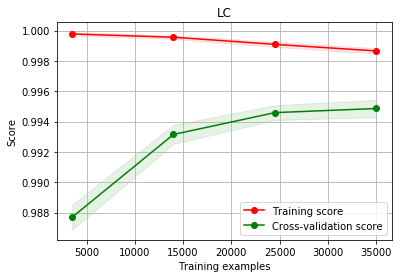

In [70]:
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
import numpy as np
import warnings

with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    plt.figure()
    plt.title('LC')
    
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        pipeline, features, labels, cv=5, n_jobs=4, train_sizes=np.linspace(.1, 1.0, 4))
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()
    
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    plt.show()


/home/dkovac/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:95: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/dkovac/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:128: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


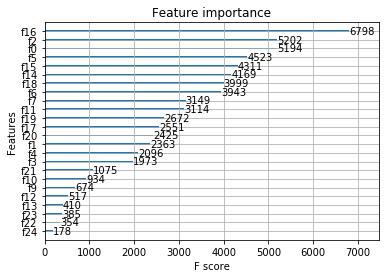

array([0.08243266, 0.03750258, 0.08255964, 0.03131299, 0.03326509,
       0.07178339, 0.06257837, 0.04997699, 0.        , 0.01069688,
       0.01482328, 0.04942151, 0.00820518, 0.00650701, 0.06616515,
       0.0684188 , 0.10788935, 0.04048628, 0.06346712, 0.04240664,
       0.03848657, 0.01706105, 0.00561824, 0.00611024, 0.00282499],
      dtype=float32)

In [75]:
from xgboost import plot_importance
import matplotlib.pyplot as plt

pipeline.fit(features, labels)
plot_importance(pipeline.named_steps['xgb'])
plt.show()
pipeline.named_steps['xgb'].feature_importances_

In [84]:
from sklearn.externals import joblib
pipeline.fit(features, labels)
joblib.dump(pipeline, '/home/dkovac/PycharmProjects/Proteus/model/model.pkl') 

/home/dkovac/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:95: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/dkovac/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:128: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


['/home/dkovac/PycharmProjects/Proteus/model/model.pkl']